# <h1><center>PYTHON CODES FOR PROJECT</center></h1>.

# Libraries

In [18]:
import numpy as np
from numpy import mean
from numpy import std
from numpy import absolute
import math
from numpy import arange

from pandas import read_csv
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
import seaborn as sns
import pylab
import seaborn as sb

from scipy import stats
import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

from numpy import arange
from pandas import read_csv
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import ElasticNet

from sklearn import linear_model
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV

import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder
from mlxtend.preprocessing import MeanCenterer
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler



## Data Exploration


In [19]:
dataframe = pd.read_csv('CCT-TFS syyskuu Henry.csv', encoding = 'utf-8')

int_data=dataframe.drop(['Steel','Texp','Pa','Rc','lnRc'], axis = 1)
dataframe = pd.DataFrame(dataframe)
dataframe

,Steel,C,Si,Mn,Cr,Mo,Ni,Al,Cu,ppmB,Pa,Rc,lnRc,Texp
0,GA01,0.13,0.27,0.22,0.08,0.00,0.06,0.00,0.22,0.0,1132.36,60.000,4.094345,770
1,GA01,0.13,0.27,0.22,0.08,0.00,0.06,0.00,0.22,0.0,1132.36,8.500,2.140066,805
2,GA01,0.13,0.27,0.22,0.08,0.00,0.06,0.00,0.22,0.0,1132.36,0.650,-0.430783,825
3,GA01,0.13,0.27,0.21,0.08,0.00,0.06,0.00,0.22,0.0,1132.36,0.050,-2.995732,840
4,GA01,0.13,0.27,0.21,0.08,0.00,0.06,0.00,0.22,0.0,1132.36,0.004,-5.521461,855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1267,XOM05,0.20,0.36,0.80,1.12,0.01,0.02,0.05,0.01,28.0,1286.59,6.000,1.791759,755
1268,XOM05,0.20,0.36,0.80,1.12,0.01,0.02,0.05,0.01,28.0,1286.59,3.000,1.098612,775
1269,XOM05,0.20,0.36,0.80,1.12,0.01,0.02,0.05,0.01,28.0,1286.59,1.500,0.405465,790
1270,XOM07,0.20,0.40,1.78,0.27,0.01,1.15,0.05,0.01,28.0,1286.59,1.500,0.405465,650


In [20]:
int_data.describe()

,C,Si,Mn,Cr,Mo,Ni,Al,Cu,ppmB
count,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000
mean,0.279198,0.484733,0.945165,0.603813,0.198035,0.517162,0.037846,0.097421,2.047720
std,0.152034,0.503829,0.559432,0.668445,0.247477,0.958594,0.191431,0.217629,5.445686
min,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.160000,0.270000,0.570000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.280000,0.330000,0.820000,0.410000,0.060000,0.060000,0.000000,0.000000,0.000000
75%,0.380000,0.450000,1.322500,1.070000,0.350000,0.510000,0.000000,0.180000,0.000000
max,0.860000,2.630000,5.030000,5.480000,1.320000,5.290000,2.110000,2.030000,31.600000


## Model Formulation - Interactions

In [21]:

interaction = PolynomialFeatures(degree=3, include_bias=True, interaction_only=True)
interaction1=interaction.fit_transform(int_data)
interaction1
dataset = pd.DataFrame(interaction1)

features = pd.DataFrame(interaction.transform(int_data), columns=interaction.get_feature_names(int_data.columns))
#print (features)

features = pd.DataFrame(features)
interaction_data = features
interaction_data


a = dataframe[dataframe.columns[-4:]]
frames = [interaction_data, a]
data = pd.concat(frames, axis=1)
data

,1,C,Si,Mn,Cr,Mo,Ni,Al,Cu,ppmB,...,Mo Al ppmB,Mo Cu ppmB,Ni Al Cu,Ni Al ppmB,Ni Cu ppmB,Al Cu ppmB,Pa,Rc,lnRc,Texp
0,1.0,0.13,0.27,0.22,0.08,0.00,0.06,0.00,0.22,0.0,...,0.0000,0.0000,0.000000,0.00000,0.0000,0.0000,1132.36,60.000,4.094345,770
1,1.0,0.13,0.27,0.22,0.08,0.00,0.06,0.00,0.22,0.0,...,0.0000,0.0000,0.000000,0.00000,0.0000,0.0000,1132.36,8.500,2.140066,805
2,1.0,0.13,0.27,0.22,0.08,0.00,0.06,0.00,0.22,0.0,...,0.0000,0.0000,0.000000,0.00000,0.0000,0.0000,1132.36,0.650,-0.430783,825
3,1.0,0.13,0.27,0.21,0.08,0.00,0.06,0.00,0.22,0.0,...,0.0000,0.0000,0.000000,0.00000,0.0000,0.0000,1132.36,0.050,-2.995732,840
4,1.0,0.13,0.27,0.21,0.08,0.00,0.06,0.00,0.22,0.0,...,0.0000,0.0000,0.000000,0.00000,0.0000,0.0000,1132.36,0.004,-5.521461,855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1267,1.0,0.20,0.36,0.80,1.12,0.01,0.02,0.05,0.01,28.0,...,0.0140,0.0028,0.000010,0.02800,0.0056,0.0140,1286.59,6.000,1.791759,755
1268,1.0,0.20,0.36,0.80,1.12,0.01,0.02,0.05,0.01,28.0,...,0.0140,0.0028,0.000010,0.02800,0.0056,0.0140,1286.59,3.000,1.098612,775
1269,1.0,0.20,0.36,0.80,1.12,0.01,0.02,0.05,0.01,28.0,...,0.0140,0.0028,0.000010,0.02800,0.0056,0.0140,1286.59,1.500,0.405465,790
1270,1.0,0.20,0.40,1.78,0.27,0.01,1.15,0.05,0.01,28.0,...,0.0140,0.0028,0.000575,1.61000,0.3220,0.0140,1286.59,1.500,0.405465,650


## Data Preprocessing 

### Standardization

In [22]:
x=data.drop(['Texp'], axis = 1)
y=data.Texp
x=x.astype(float)
y=y.astype(float)

scaler = StandardScaler().fit(x)
rescaledX = scaler.transform(x)

rescaledX=pd.DataFrame(rescaledX)
data = rescaledX

data = data.set_axis(['1', 'C', 'Si', 'Mn', 'Cr', 'Mo', 'Ni', 'Al', 'Cu', 'ppmB', 'C Si',
       'C Mn', 'C Cr', 'C Mo', 'C Ni', 'C Al', 'C Cu', 'C ppmB', 'Si Mn',
       'Si Cr', 'Si Mo', 'Si Ni', 'Si Al', 'Si Cu', 'Si ppmB', 'Mn Cr',
       'Mn Mo', 'Mn Ni', 'Mn Al', 'Mn Cu', 'Mn ppmB', 'Cr Mo', 'Cr Ni',
       'Cr Al', 'Cr Cu', 'Cr ppmB', 'Mo Ni', 'Mo Al', 'Mo Cu', 'Mo ppmB',
       'Ni Al', 'Ni Cu', 'Ni ppmB', 'Al Cu', 'Al ppmB', 'Cu ppmB', 'C Si Mn',
       'C Si Cr', 'C Si Mo', 'C Si Ni', 'C Si Al', 'C Si Cu', 'C Si ppmB',
       'C Mn Cr', 'C Mn Mo', 'C Mn Ni', 'C Mn Al', 'C Mn Cu', 'C Mn ppmB',
       'C Cr Mo', 'C Cr Ni', 'C Cr Al', 'C Cr Cu', 'C Cr ppmB', 'C Mo Ni',
       'C Mo Al', 'C Mo Cu', 'C Mo ppmB', 'C Ni Al', 'C Ni Cu', 'C Ni ppmB',
       'C Al Cu', 'C Al ppmB', 'C Cu ppmB', 'Si Mn Cr', 'Si Mn Mo', 'Si Mn Ni',
       'Si Mn Al', 'Si Mn Cu', 'Si Mn ppmB', 'Si Cr Mo', 'Si Cr Ni',
       'Si Cr Al', 'Si Cr Cu', 'Si Cr ppmB', 'Si Mo Ni', 'Si Mo Al',
       'Si Mo Cu', 'Si Mo ppmB', 'Si Ni Al','Si Ni Cu', 'Si Ni ppmB', 'Si Al Cu', 'Si Al ppmB',
       'Si Cu ppmB', 'Mn Cr Mo', 'Mn Cr Ni', 'Mn Cr Al', 'Mn Cr Cu',
       'Mn Cr ppmB', 'Mn Mo Ni', 'Mn Mo Al', 'Mn Mo Cu', 'Mn Mo ppmB',
       'Mn Ni Al', 'Mn Ni Cu', 'Mn Ni ppmB', 'Mn Al Cu', 'Mn Al ppmB',
       'Mn Cu ppmB', 'Cr Mo Ni', 'Cr Mo Al', 'Cr Mo Cu', 'Cr Mo ppmB',
       'Cr Ni Al', 'Cr Ni Cu', 'Cr Ni ppmB', 'Cr Al Cu', 'Cr Al ppmB',
       'Cr Cu ppmB', 'Mo Ni Al', 'Mo Ni Cu', 'Mo Ni ppmB', 'Mo Al Cu',
       'Mo Al ppmB', 'Mo Cu ppmB', 'Ni Al Cu', 'Ni Al ppmB', 'Ni Cu ppmB',
       'Al Cu ppmB', 'Pa','Rc','lnRc'], axis=1, inplace=False)

data.describe()


,1,C,Si,Mn,Cr,Mo,Ni,Al,Cu,ppmB,...,Mo Al Cu,Mo Al ppmB,Mo Cu ppmB,Ni Al Cu,Ni Al ppmB,Ni Cu ppmB,Al Cu ppmB,Pa,Rc,lnRc
count,1272.0,1.272000e+03,1.272000e+03,1.272000e+03,1272.000000,1.272000e+03,1.272000e+03,1.272000e+03,1.272000e+03,1.272000e+03,...,1.272000e+03,1272.000000,1.272000e+03,1.272000e+03,1272.000000,1272.000000,1.272000e+03,1.272000e+03,1.272000e+03,1.272000e+03
mean,0.0,3.351617e-17,-6.703233e-17,8.937644e-17,0.000000,8.937644e-17,-3.351617e-17,-3.351617e-17,-8.379042e-17,1.117206e-16,...,5.586028e-18,0.000000,-1.117206e-17,2.234411e-17,0.000000,0.000000,-2.234411e-17,1.698152e-15,2.234411e-17,-1.396507e-17
std,0.0,1.000393e+00,1.000393e+00,1.000393e+00,1.000393,1.000393e+00,1.000393e+00,1.000393e+00,1.000393e+00,1.000393e+00,...,1.000393e+00,1.000393,1.000393e+00,1.000393e+00,1.000393,1.000393,1.000393e+00,1.000393e+00,1.000393e+00,1.000393e+00
min,0.0,-1.705544e+00,-9.624766e-01,-1.690174e+00,-0.903665,-8.005285e-01,-5.397128e-01,-1.977777e-01,-4.478251e-01,-3.761740e-01,...,-1.098868e-01,-0.130638,-8.992502e-02,-8.266487e-02,-0.090785,-0.102897,-1.954022e-01,-1.599698e+00,-2.656918e-01,-1.979480e+00
25%,0.0,-7.843330e-01,-4.263694e-01,-6.708822e-01,-0.903665,-8.005285e-01,-5.397128e-01,-1.977777e-01,-4.478251e-01,-3.761740e-01,...,-1.098868e-01,-0.130638,-8.992502e-02,-8.266487e-02,-0.090785,-0.102897,-1.954022e-01,-6.411991e-01,-2.631797e-01,-8.446351e-01
50%,0.0,5.276478e-03,-3.072345e-01,-2.238242e-01,-0.290060,-5.579865e-01,-4.770965e-01,-1.977777e-01,-4.478251e-01,-3.761740e-01,...,-1.098868e-01,-0.130638,-8.992502e-02,-8.266487e-02,-0.090785,-0.102897,-1.954022e-01,-3.132128e-01,-2.509783e-01,-1.277055e-01
75%,0.0,6.632844e-01,-6.896464e-02,6.747623e-01,0.697694,6.143000e-01,-7.474246e-03,-1.977777e-01,3.795961e-01,-3.761740e-01,...,-1.098868e-01,-0.130638,-8.992502e-02,-8.266487e-02,-0.090785,-0.102897,-1.954022e-01,1.384854e-01,-1.223250e-01,8.217961e-01
max,0.0,3.821722e+00,4.259605e+00,7.304632e+00,7.297688,4.535396e+00,4.980958e+00,1.082880e+01,8.883648e+00,5.428867e+00,...,1.708205e+01,15.347860,2.098018e+01,1.938510e+01,22.167151,23.945319,1.174974e+01,3.624296e+00,1.364017e+01,2.738349e+00


#### The bell curve

/home/dave/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


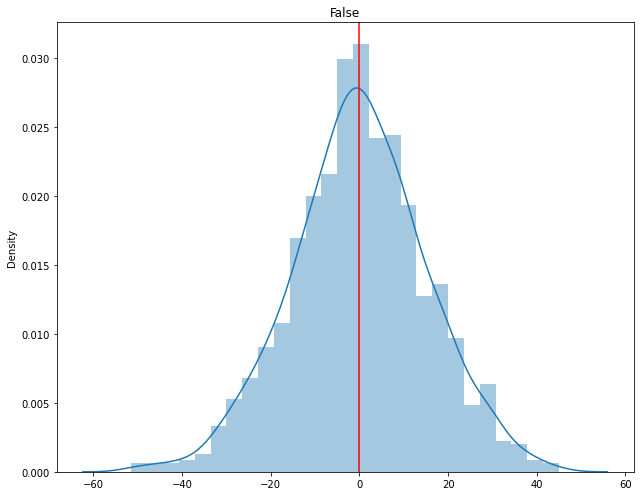

In [23]:
x=data
x=x.astype(float)
y=y.astype(float)

model_Simple = sm.OLS(y, x).fit()
x2 = sm.add_constant(x, prepend=True, has_constant='skip')
model = sm.OLS(y, x2).fit()
residuals=model.resid

fig,axes = plt.subplots(1,1,figsize=(9,7))
axlist = axes

sb.distplot(residuals,hist=True, kde=True, ax=axlist)
axlist.axvline(x=np.mean(residuals), color =  'r')
axlist.set_title(residuals.empty)
plt.tight_layout()

#### Log transformation

/home/dave/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/dave/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/dave/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/dave/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


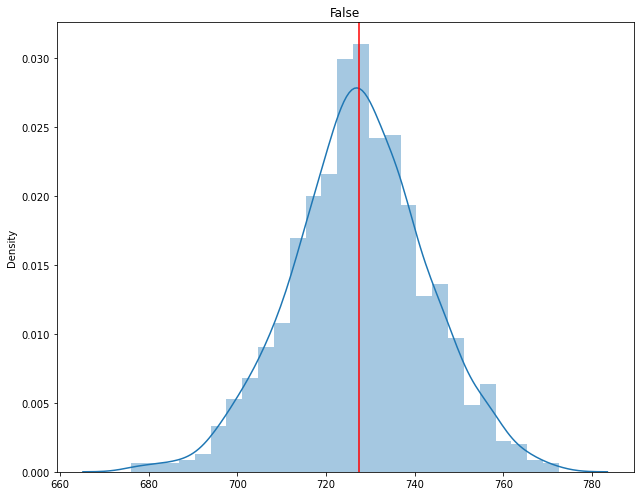

In [24]:
transformed_data=dat.transform(func = lambda x : np.sqrt(x))
transformed_data1=dat.transform(func = lambda x : np.log(x))
transformed_data2=dat.transform(func = lambda x : np.exp(x))

transformed_data1 = pd.DataFrame.values
transformed_x1=x
transformed_y1=y
transformed_x1=x.astype(float)
transformed_y1=y.astype(float)

transformed_x3 = sm.add_constant(transformed_x1, prepend=True, has_constant='skip')
model = sm.OLS(transformed_y1, transformed_x1).fit()
transformed_residuals1=model.resid
#model.summary()

fig,axes = plt.subplots(1,1,figsize=(9,7))
axlist = axes

sb.distplot(transformed_residuals1,hist=True, kde=True, ax=axlist)
axlist.axvline(x=np.mean(transformed_residuals1), color =  'r')
axlist.set_title(transformed_residuals1.empty)
plt.tight_layout()


# DATA DIVISION
##### Pearson Correlation

In [25]:
#Since the Data in normally Distribution, we use the Pearson Correlation
DATA=dataframe.drop(['Steel','Pa','Rc','lnRc'], axis = 1)
cor = DATA.corr()
cor_target = abs(cor["Texp"])
cor_target = pd.DataFrame(cor_target)
print(mean(cor_target))
cor_target

Texp    0.261353
dtype: float64


,Texp
C,0.459960
Si,0.114349
Mn,0.172845
Cr,0.019890
Mo,0.023583
Ni,0.419897
Al,0.182651
Cu,0.027722
ppmB,0.192632
Texp,1.000000


### Train, Test and Validation 
####  Stratified Random Sampling

In [26]:
train_ratio = 0.75
validation_ratio = 0.15
test_ratio = 0.10
x=x2
y=y

X_train, X_test, y_train, y_test = train_test_split(x, y, 
                                                        test_size=1 - train_ratio, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, 
                                                test_size=test_ratio/(test_ratio + validation_ratio), random_state=0) 

# RIDGE REGULARIZATION PATHS

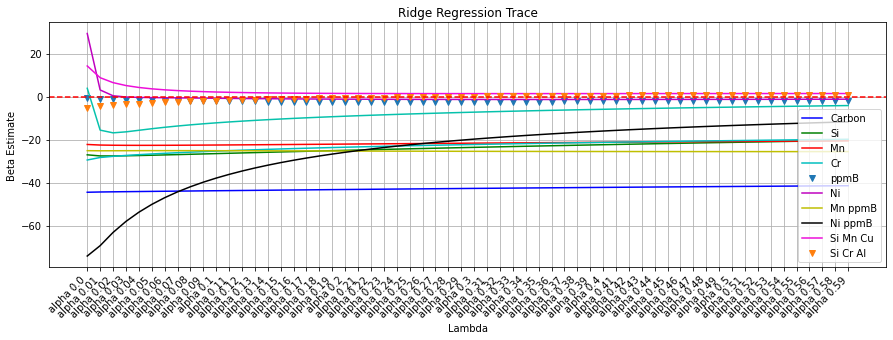

In [31]:
ridge_df = pd.DataFrame({'variable': x.columns})
ridge_train_pred = {}
ridge_test_pred = {}

alphas = np.arange(0, 2, 0.01)

for n, alpha in enumerate(alphas):
    if (n<60):
        ridge_reg = Ridge(alpha=alpha)
        ridge_reg.fit(X_train, y_train)
        var_name = 'alpha ' + str(round(alpha,3))
        ridge_df[var_name] = ridge_reg.coef_
        # prediction
        #ridge_train_pred['alpha '+str(round(alpha,3))]=ridge_reg.predict(X_train)
        ridge_test_pred['alpha '+str(round(alpha,3))]=ridge_reg.predict(X_test)
    else:
        pass
ridge_df =ridge_df.set_index('variable').T

fig, ax = plt.subplots(figsize=(15, 5))


ax.plot(ridge_df.C,'b', ridge_df.Si, 'g', ridge_df.Mn, 'r', ridge_df.Cr, 'c', ridge_df.Mo, 'v',
        ridge_df.Al, 'm', ridge_df.Ni, 'y',ridge_df["Mn ppmB"],'k', ridge_df["Ni ppmB"],'#ED0DD9', 
        ridge_df["Si Mn Cu"], 'v', ridge_df["Si Cr Al"], '#06C2AC')

#ax.plot(ridge_df.C,'r', ridge_df.Si, 'g', ridge_df.Mn, 'b', ridge_df.Cr, 'c', ridge_df.Al, 'k')
ax.set_xlabel("alpha")

ax.axhline(y=0, color='red', linestyle='--')
ax.set_xlabel("Lambda")
ax.set_ylabel("Beta Estimate")
ax.set_title("Ridge Regression Trace", fontsize=12)
ax.legend(labels=['Carbon','Si','Mn','Cr','ppmB', 'Ni', 'Mn ppmB', 'Ni ppmB', 'Si Mn Cu', 'Si Cr Al'])
fig.autofmt_xdate(rotation=45)
ax.grid(True)

### Getting the Alpha Value Using the RMSE

In [28]:

def RMSE(x,y):
    a = np.sum((x-y)**2)
    b=len(ridge_test_pred[alpha])
    return np.sqrt(a/b)

ds ={}
dz = {}
dc ={}

for alpha in ridge_test_pred.keys():
    predicted = ridge_test_pred[alpha ] 
    observed = y_test.values
    RMSE( predicted, observed)
    my_rho = np.corrcoef(observed, predicted)
    rms=RMSE(observed, predicted)
    ds[alpha]=my_rho,rms
    dz[alpha]=rms
    dc[alpha]=my_rho

df1 = pd.DataFrame(list(dz.items()),columns = ['ALPHA','RMSE'])
df2 = pd.DataFrame(list(ds.items()),columns = ['ALPHA','RMSE'])
df3 = pd.DataFrame(list(dc.items()),columns = ['ALPHA','PEARSON_CORRELATION'])
#print (df1)


In [29]:
model = sm.OLS(y_train, X_train)
results_fu = model.fit()
results_fr = model.fit_regularized(L1_wt=0, alpha=0.0001, start_params=results_fu.params)
results_fr_fit = sm.regression.linear_model.OLSResults(model, results_fr.params, model.normalized_cov_params)

final = sm.regression.linear_model.OLSResults(model, results_fr.params, model.normalized_cov_params)

final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Texp   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     58.44
Date:                Sat, 09 Oct 2021   Prob (F-statistic):               0.00
Time:                        16:45:51   Log-Likelihood:                -3921.7
No. Observations:                 954   AIC:                             8109.
Df Residuals:                     821   BIC:                             8756.
Df Model:                         132                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        727.8057      0.664   1095.781      0.000     726.502     729.109
1          -4.568e-12   2.98e-12     -1.532      0.126   -1.04e-11    1.28e-12
C            -43.8283      3.199    -13.701      0.000     -50.107     -37.549
Si           -26.5950      7.119     -3.736      0.000     -40.569     -12.621
Mn           -22.5542      2.867     -7.867      0.000     -28.181     -16.927
Cr           -25.4347      8.595     -2.959      0.003     -42.305      -8.565
Mo            -2.1243      6.346     -0.335      0.738     -14.581      10.332
Ni           -25.2001      8.519     -2.958      0.003     -41.921      -8.479
Al            -0.8539    106.169     -0.008      0.994    -209.249     207.541
Cu           -35.6201      8.721     -4.085      0.000     -52.737     -18.503
ppmB          17.7803     37.022      0.480      0.631     -54.889      90.450
C Si          30.3106      8.358      3.627      0.000      13.905      46.716
C Mn          -9.2179      3.739     -2.466      0.014     -16.556      -1.880
C Cr          12.7922      7.644      1.674      0.095      -2.211      27.795
C Mo         -19.0443      8.402     -2.267      0.024     -35.536      -2.553
C Ni          -9.5238      7.233     -1.317      0.188     -23.722       4.674
C Al          -2.8590    125.410     -0.023      0.982    -249.022     243.304
C Cu          22.8393      4.082      5.595      0.000      14.827      30.851
C ppmB       -10.5225     39.981     -0.263      0.792     -89.000      67.955
Si Mn         26.7502      6.613      4.045      0.000      13.770      39.731
Si Cr          2.4594     11.957      0.206      0.837     -21.010      25.929
Si Mo         13.5351     12.126      1.116      0.265     -10.266      37.337
Si Ni        -15.5541     11.699     -1.330      0.184     -38.518       7.410
Si Al        -47.8985     97.332     -0.492      0.623    -238.947     143.150
Si Cu         22.3886      9.115      2.456      0.014       4.497      40.281
Si ppmB      -17.1839     35.265     -0.487      0.626     -86.405      52.037
Mn Cr         -5.4724      4.728     -1.157      0.247     -14.754       3.809
Mn Mo         -4.2032      6.089     -0.690      0.490     -16.155       7.748
Mn Ni         13.3509      6.560      2.035      0.042       0.474      26.228
Mn Al        -13.2156     77.688     -0.170      0.865    -165.706     139.275
Mn Cu         -0.6417      9.176     -0.070      0.944     -18.653      17.370
Mn ppmB      -38.7649     34.898     -1.111      0.267    -107.264      29.734
Cr Mo         16.6260      5.715      2.909      0.004       5.407      27.845
Cr Ni         -3.6667      5.172     -0.709      0.479     -13.818       6.485
Cr Al         61.4802    106.232      0.579      0.563    -147.037     269.998
Cr Cu          5.6416      6.405      0.881      0.379      -6.931      18.214
Cr

#   <h1><center>LASSO REGULARIZATION!</center></h1>.

<ipython-input-32-0c25d5b9970f>:12: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso_reg.fit(X_train, y_train)
/home/dave/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/dave/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 107494.74867061192, tolerance: 216.0140603773585
  model = cd_fast.enet_coordinate_descent(
/home/dave/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 50346.04353882682, tolerance: 216.0140603773585
  model 

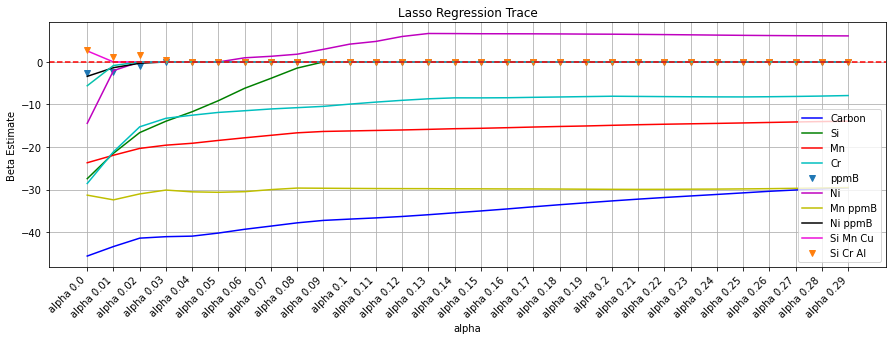

In [32]:

lasso_df = pd.DataFrame({'variable': x.columns})
lasso_train_pred = {}
lasso_test_pred = {}

#alphas = np.arange(0, 0.001, 0.0001)
#alphas = np.arange(0.00001, 0.1, 0.00001)
alphas = np.arange(0, 1, 0.01)

for n, alpha in enumerate(alphas):
    if (n<30):
        lasso_reg = Lasso(alpha=alpha)
        lasso_reg.fit(X_train, y_train)
        var_name = 'alpha ' + str(round(alpha,5))
        lasso_df[var_name] = lasso_reg.coef_
        lasso_test_pred['alpha '+str(round(alpha,3))]=lasso_reg.predict(X_test)
    else:
        pass

lasso_df =lasso_df.set_index('variable').T

fig, ax = plt.subplots(figsize=(15, 5))

ax.plot(lasso_df.C,'b', lasso_df.Si, 'g', lasso_df.Mn, 'r', lasso_df.Cr, 'c', lasso_df.Mo, 'v',
        lasso_df.Al, 'm', lasso_df.Ni, 'y',lasso_df["Mn ppmB"],'k', lasso_df["Ni ppmB"],'#ED0DD9', 
        lasso_df["Si Mn Cu"], 'v', lasso_df["Si Cr Al"], '#06C2AC')

#ax.plot(lasso_df.C,'r', lasso_df.Si, 'g', lasso_df.Mn, 'b', lasso_df.Cr, 'c', lasso_df.Al, 'k', lasso_df.Ni, 'y',lasso_df.Mo, 'v' )
ax.set_xlabel("alpha")
ax.axhline(y=0, color='red', linestyle='--')

#ax.set_xticklabels(np.arange(-1, 10, 1))
ax.set_ylabel("Beta Estimate")
ax.set_title("Lasso Regression Trace", fontsize=12)
ax.legend(labels=['Carbon','Si','Mn','Cr','ppmB', 'Ni', 'Mn ppmB', 'Ni ppmB', 'Si Mn Cu', 'Si Cr Al'])
fig.autofmt_xdate(rotation=45)
ax.grid(True)

### Getting the Alpha Value Using the RMSE

In [686]:

def RMSE(x,y):
    a = np.sum((x-y)**2)
    b=len(lasso_test_pred[alpha])
    return np.sqrt(a/b)

ds ={}
dz = {}
dc ={}

for alpha in lasso_test_pred.keys():
    predicted = lasso_test_pred[alpha ] 
    observed = y_test.values
    RMSE( predicted, observed)
    my_rho = np.corrcoef(observed, predicted)
    rms=RMSE(observed, predicted)
    ds[alpha]=my_rho,rms
    dz[alpha]=rms
    dc[alpha]=my_rho

df1 = pd.DataFrame(list(dz.items()),columns = ['ALPHA','RMSE'])
df2 = pd.DataFrame(list(ds.items()),columns = ['ALPHA','RMSE'])
df3 = pd.DataFrame(list(dc.items()),columns = ['ALPHA','PEARSON_CORRELATION'])
print (df1)


         ALPHA       RMSE
0    alpha 0.0  36.804772
1   alpha 0.01  31.960898
2   alpha 0.02  28.082445
3   alpha 0.03  25.607295
4   alpha 0.04  24.292149
5   alpha 0.05  23.991889
6   alpha 0.06  23.580823
7   alpha 0.07  23.362560
8   alpha 0.08  23.231508
9   alpha 0.09  23.165407
10   alpha 0.1  23.028801
11  alpha 0.11  22.900637
12  alpha 0.12  22.765698
13  alpha 0.13  22.648786
14  alpha 0.14  22.547238
15  alpha 0.15  22.452973
16  alpha 0.16  22.375769
17  alpha 0.17  22.319382
18  alpha 0.18  22.278277
19  alpha 0.19  22.247994
20   alpha 0.2  22.227138
21  alpha 0.21  22.215707
22  alpha 0.22  22.218139
23  alpha 0.23  22.232879
24  alpha 0.24  22.265504
25  alpha 0.25  22.314400
26  alpha 0.26  22.376565
27  alpha 0.27  22.429398
28  alpha 0.28  22.479741
29  alpha 0.29  22.523267


/home/dave/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [687]:
model = sm.OLS(y_train, X_train)

results_fu = model.fit()
results_fr = model.fit_regularized(L1_wt=1, alpha=0.21, start_params=results_fu.params, refit=False)
results_fr_fit = sm.regression.linear_model.OLSResults(model, results_fr.params, model.normalized_cov_params)
final_lasso = sm.regression.linear_model.OLSResults(model, results_fr.params, model.normalized_cov_params)

final_lasso.summary()

/home/dave/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Texp   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     49.81
Date:                Wed, 11 Aug 2021   Prob (F-statistic):          8.14e-315
Time:                        11:39:25   Log-Likelihood:                -3990.0
No. Observations:                 954   AIC:                             8246.
Df Residuals:                     821   BIC:                             8892.
Df Model:                         132                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        728.5133      0.713   1021.053      0.000     727.113     729.914
1                   0    3.2e-12          0      1.000   -6.29e-12    6.29e-12
C            -34.8281      3.436    -10.135      0.000     -41.573     -28.083
Si           -12.4492      7.648     -1.628      0.104     -27.461       2.562
Mn           -21.4413      3.080     -6.962      0.000     -27.486     -15.396
Cr           -16.4222      9.233     -1.779      0.076     -34.544       1.700
Mo                  0      6.817          0      1.000     -13.381      13.381
Ni           -21.2901      9.151     -2.326      0.020     -39.253      -3.328
Al            20.0484    114.050      0.176      0.861    -203.816     243.912
Cu           -31.0040      9.368     -3.310      0.001     -49.392     -12.616
ppmB          48.7828     39.770      1.227      0.220     -29.281     126.847
C Si          11.5921      8.978      1.291      0.197      -6.031      29.216
C Mn         -10.3335      4.016     -2.573      0.010     -18.216      -2.450
C Cr           3.4604      8.211      0.421      0.674     -12.657      19.577
C Mo         -10.4748      9.025     -1.161      0.246     -28.190       7.241
C Ni          -7.3571      7.770     -0.947      0.344     -22.609       7.895
C Al          54.3066    134.720      0.403      0.687    -210.129     318.742
C Cu          10.6729      4.385      2.434      0.015       2.066      19.280
C ppmB        -3.0121     42.949     -0.070      0.944     -87.315      81.291
Si Mn         18.1312      7.104      2.552      0.011       4.187      32.075
Si Cr               0     12.844          0      1.000     -25.211      25.211
Si Mo         -0.4455     13.026     -0.034      0.973     -26.014      25.123
Si Ni        -16.2892     12.568     -1.296      0.195     -40.958       8.379
Si Al       -162.9352    104.557     -1.558      0.120    -368.165      42.295
Si Cu         15.1248      9.792      1.545      0.123      -4.095      34.345
Si ppmB      -39.4211     37.883     -1.041      0.298    -113.780      34.938
Mn Cr         -1.7755      5.079     -0.350      0.727     -11.746       8.195
Mn Mo         -6.8975      6.541     -1.055      0.292     -19.736       5.941
Mn Ni          3.0125      7.047      0.427      0.669     -10.820      16.845
Mn Al        -67.1596     83.455     -0.805      0.421    -230.970      96.651
Mn Cu               0      9.857          0      1.000     -19.348      19.348
Mn ppmB      -57.3134     37.488     -1.529      0.127    -130.897      16.271
Cr Mo          7.5521      6.140      1.230      0.219      -4.499      19.604
Cr Ni               0      5.556          0      1.000     -10.905      10.905
Cr Al        185.5360    114.117      1.626      0.104     -38.460     409.532
Cr Cu          4.3116      6.881      0.627      0.531      -9.194      17.817
Cr

# <h1><center>ELASTIC_NET REGULARIZATION !</center></h1>.

<ipython-input-33-780a72098f93>:2: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  elastic.fit(X_train, y_train)
/home/dave/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/dave/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 107494.74867061192, tolerance: 216.0140603773585
  model = cd_fast.enet_coordinate_descent(
/home/dave/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 51668.67970862423, tolerance: 216.0140603773585
  model = c

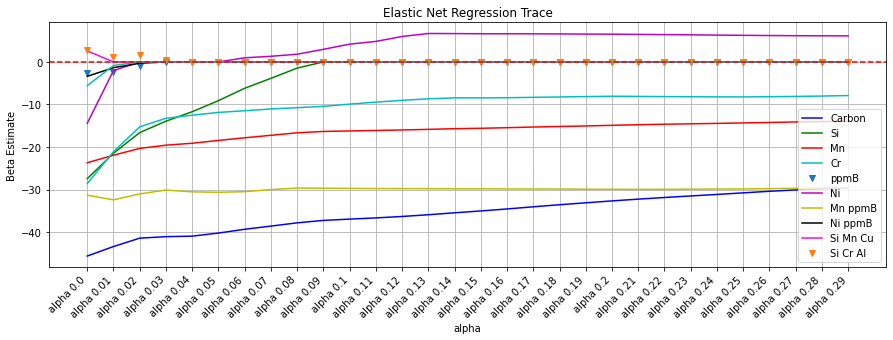

In [33]:
elastic = linear_model.ElasticNet(alpha=0)
elastic.fit(X_train, y_train)
elastic_df = pd.DataFrame({'variable': x.columns})
elastic_train_pred = {}
elastic_test_pred = {}
elastic_val_pred = {}

alphas = np.arange(0.01, 1, 0.01)
#alphas = np.arange(0.0001, 1, 0.0001)
#alphas = np.arange(0.00001, 0.01, 0.00001)

for n, alpha in enumerate(alphas):
    if (n<60):
        elastic_reg =linear_model.ElasticNet(alpha=alpha)
        elastic_reg.fit(X_train, y_train)
        var_name = 'alpha ' + str(round(alpha,5))
        elastic_df[var_name] = elastic.coef_
        # prediction
        elastic_train_pred['alpha '+str(round(alpha,3))]=elastic_reg.predict(X_train)
        elastic_test_pred['alpha '+str(round(alpha,5))]=elastic_reg.predict(X_test)
        elastic_val_pred['alpha '+str(round(alpha,5))]=elastic_reg.predict(X_val)

    else:
        pass

elastic_df =elastic_df.set_index('variable').T

fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(elastic_df.C,'b', elastic_df.Si, 'g', elastic_df.Mn, 'r', elastic_df.Cr, 'c',  elastic_df.Mo, '#AAA662',
        elastic_df.ppmB, 'm', elastic_df.Ni, 'y', elastic_df["Mn ppmB"],'k', elastic_df["Ni ppmB"],'#ED0DD9',
        elastic_df["Si Mn Cu"], 'v', elastic_df["Si Cr Al"], '#06C2AC' )

ax.set_xlabel("alpha")

ax.axhline(y=0, color='red', linestyle='--')

ax.set_ylabel("Beta Estimate")
ax.set_title("Elastic Net Regression Trace", fontsize=12)
ax.legend(labels=['Carbon','Si','Mn','Cr','ppmB', 'Ni', 'Mn ppmB', 'Ni ppmB', 'Si Mn Cu', 'Si Cr Al'])
fig.autofmt_xdate(rotation=45)
ax.grid(True)


In [689]:
#elastic_val_pred['alpha 0.08']

/home/dave/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### ElasticNet Alpha Value Test Using RMSE

In [690]:
elastic_df.iloc[9,:]*X_test
elastic_test=elastic_df.iloc[9,:]*X_test
#b=len(elastic_test_pred['alpha 0.003'])
b=len(elastic_test_pred['alpha 0.01'])
def RMSE(x,y):
    a = np.sum((x-y)**2)
    b
    return np.sqrt(a/b)

ds ={}
dz = {}
dc ={}

for alpha in elastic_test_pred.keys():
    predicted = elastic_test_pred[alpha ] 
    observed = y_test.values
    RMSE( predicted, observed)
    my_rho = np.corrcoef(observed, predicted)
    rms=RMSE(observed, predicted)
    ds[alpha]=my_rho,rms
    dz[alpha]=rms
    dc[alpha]=my_rho

df1 = pd.DataFrame(list(dz.items()),columns = ['ALPHA','RMSE'])
df2 = pd.DataFrame(list(ds.items()),columns = ['ALPHA','RMSE'])
df3 = pd.DataFrame(list(dc.items()),columns = ['ALPHA','PEARSON_CORRELATION'])
df1

,ALPHA,RMSE
0,alpha 0.01,26.702025
1,alpha 0.02,25.103428
2,alpha 0.03,24.748706
3,alpha 0.04,24.263952
4,alpha 0.05,23.978662
5,alpha 0.06,23.809523
6,alpha 0.07,23.720574
7,alpha 0.08,23.683424
8,alpha 0.09,23.684493
9,alpha 0.1,23.721470


In [691]:
model = sm.OLS(y_train, X_train)

results_fu = model.fit()
results_fr=model.fit_regularized(method='elastic_net', L1_wt=0.5, alpha = 0.008,
                                 start_params=results_fu.params, refit=False)

results_fr_fit = sm.regression.linear_model.OLSResults(model, results_fr.params, model.normalized_cov_params)
final = sm.regression.linear_model.OLSResults(model, results_fr.params, model.normalized_cov_params)
final.summary()

/home/dave/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Texp   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     52.07
Date:                Wed, 11 Aug 2021   Prob (F-statistic):          9.63e-322
Time:                        11:39:47   Log-Likelihood:                -3971.1
No. Observations:                 954   AIC:                             8208.
Df Residuals:                     821   BIC:                             8855.
Df Model:                         132                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        725.4835      0.699   1037.148      0.000     724.110     726.856
1                   0   3.14e-12          0      1.000   -6.16e-12    6.16e-12
C            -39.4552      3.369    -11.711      0.000     -46.068     -32.842
Si           -21.0720      7.498     -2.810      0.005     -35.789      -6.355
Mn           -20.4374      3.019     -6.769      0.000     -26.364     -14.511
Cr           -23.3510      9.051     -2.580      0.010     -41.118      -5.584
Mo            -0.3359      6.683     -0.050      0.960     -13.455      12.783
Ni           -24.3025      8.972     -2.709      0.007     -41.913      -6.692
Al            35.4709    111.813      0.317      0.751    -184.003     254.944
Cu           -34.7418      9.184     -3.783      0.000     -52.769     -16.715
ppmB          47.3870     38.990      1.215      0.225     -29.146     123.920
C Si          22.4087      8.802      2.546      0.011       5.131      39.687
C Mn         -11.3617      3.937     -2.886      0.004     -19.090      -3.633
C Cr           9.1359      8.050      1.135      0.257      -6.665      24.937
C Mo         -18.8743      8.848     -2.133      0.033     -36.242      -1.506
C Ni         -11.9212      7.618     -1.565      0.118     -26.874       3.031
C Al          48.5242    132.078      0.367      0.713    -210.725     307.774
C Cu          18.3722      4.299      4.274      0.000       9.934      26.810
C ppmB        -2.7543     42.107     -0.065      0.948     -85.404      79.895
Si Mn         23.1847      6.965      3.329      0.001       9.514      36.855
Si Cr         -0.5372     12.592     -0.043      0.966     -25.254      24.180
Si Mo         11.1993     12.771      0.877      0.381     -13.868      36.266
Si Ni        -13.6269     12.321     -1.106      0.269     -37.811      10.558
Si Al       -141.3361    102.506     -1.379      0.168    -342.541      59.869
Si Cu         23.6448      9.600      2.463      0.014       4.802      42.488
Si ppmB      -35.2092     37.140     -0.948      0.343    -108.110      37.692
Mn Cr         -3.9431      4.980     -0.792      0.429     -13.718       5.832
Mn Mo         -5.1603      6.413     -0.805      0.421     -17.747       7.427
Mn Ni         12.8935      6.909      1.866      0.062      -0.668      26.455
Mn Al        -65.5786     81.818     -0.802      0.423    -226.176      95.019
Mn Cu          1.9389      9.664      0.201      0.841     -17.030      20.908
Mn ppmB      -58.2995     36.753     -1.586      0.113    -130.440      13.841
Cr Mo         14.3593      6.019      2.386      0.017       2.544      26.174
Cr Ni         -2.7413      5.447     -0.503      0.615     -13.432       7.950
Cr Al        131.2848    111.879      1.173      0.241     -88.318     350.887
Cr Cu         14.1405      6.746      2.096      0.036       0.900      27.381
Cr

## Validation

### Lasso 

In [42]:
model = sm.OLS(y_val, X_val)

results_fu = model.fit()
results_fr = model.fit_regularized(L1_wt=0, alpha=0.021, start_params=results_fu.params)
results_fr_fit = sm.regression.linear_model.OLSResults(model, results_fr.params, model.normalized_cov_params)

final = sm.regression.linear_model.OLSResults(model, results_fr.params, model.normalized_cov_params)

final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Texp   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.351
Method:                 Least Squares   F-statistic:                     1.911
Date:                Sat, 09 Oct 2021   Prob (F-statistic):            0.00140
Time:                        17:06:35   Log-Likelihood:                -856.65
No. Observations:                 190   AIC:                             1939.
Df Residuals:                      77   BIC:                             2306.
Df Model:                         112                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        680.1345    215.513      3.156      0.002     250.994    1109.275
1           2.246e-13   1.67e-09      0.000      1.000   -3.32e-09    3.32e-09
C            -25.9433     27.926     -0.929      0.356     -81.550      29.664
Si             4.2014     48.565      0.087      0.931     -92.503     100.906
Mn            -6.0584     34.109     -0.178      0.859     -73.979      61.862
Cr            -6.8188     86.500     -0.079      0.937    -179.062     165.424
Mo             5.3016     84.635      0.063      0.950    -163.227     173.830
Ni           -12.6590     74.014     -0.171      0.865    -160.041     134.723
Al            19.5847    478.756      0.041      0.967    -933.741     972.911
Cu             0.2485    145.416      0.002      0.999    -289.312     289.809
ppmB         -13.0183    344.447     -0.038      0.970    -698.899     672.863
C Si           0.3287     51.261      0.006      0.995    -101.745     102.402
C Mn         -19.4867     43.918     -0.444      0.658    -106.938      67.964
C Cr          -1.9993     69.714     -0.029      0.977    -140.818     136.820
C Mo          -2.5639    107.780     -0.024      0.981    -217.181     212.053
C Ni          -5.1928     89.559     -0.058      0.954    -183.527     173.142
C Al          12.3123    491.749      0.025      0.980    -966.885     991.509
C Cu          11.4106     76.969      0.148      0.883    -141.855     164.676
C ppmB       -24.9877    202.055     -0.124      0.902    -427.331     377.356
Si Mn          4.8048     43.413      0.111      0.912     -81.641      91.251
Si Cr          3.6602    123.072      0.030      0.976    -241.408     248.728
Si Mo          9.6927    132.245      0.073      0.942    -253.640     273.025
Si Ni        -10.0247     89.029     -0.113      0.911    -187.304     167.255
Si Al        -24.4472   1337.278     -0.018      0.985   -2687.309    2638.414
Si Cu        -15.1380    205.740     -0.074      0.942    -424.818     394.542
Si ppmB       -1.6231    352.316     -0.005      0.996    -703.173     699.927
Mn Cr         -4.1114     44.903     -0.092      0.927     -93.525      85.302
Mn Mo         -0.8190     59.359     -0.014      0.989    -119.018     117.380
Mn Ni        -13.8896    114.151     -0.122      0.903    -241.193     213.414
Mn Al         -9.8851   1547.399     -0.006      0.995   -3091.151    3071.380
Mn Cu         -2.3164    202.583     -0.011      0.991    -405.712     401.079
Mn ppmB        0.7516    610.133      0.001      0.999   -1214.178    1215.681
Cr Mo          4.4034     50.144      0.088      0.930     -95.447     104.253
Cr Ni         -4.7751     61.537     -0.078      0.938    -127.310     117.760
Cr Al         14.9464   1409.882      0.011      0.992   -2792.487    2822.380
Cr Cu         -2.2936     70.263     -0.033      0.974    -142.206     137.619
Cr

### Elastic Net

In [40]:
model = sm.OLS(y_val, X_val)

results_fu = model.fit()
results_fr = model.fit_regularized(L1_wt=0, alpha=0.008, start_params=results_fu.params)
results_fr_fit = sm.regression.linear_model.OLSResults(model, results_fr.params, model.normalized_cov_params)

final = sm.regression.linear_model.OLSResults(model, results_fr.params, model.normalized_cov_params)

final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Texp   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     5.077
Date:                Sat, 09 Oct 2021   Prob (F-statistic):           8.61e-13
Time:                        17:03:10   Log-Likelihood:                -780.95
No. Observations:                 190   AIC:                             1788.
Df Residuals:                      77   BIC:                             2155.
Df Model:                         112                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        694.3236    144.692      4.799      0.000     406.205     982.442
1           3.381e-13   1.12e-09      0.000      1.000   -2.23e-09    2.23e-09
C            -31.7226     18.749     -1.692      0.095     -69.056       5.611
Si            -0.3289     32.606     -0.010      0.992     -65.255      64.597
Mn            -7.5801     22.900     -0.331      0.742     -53.181      38.021
Cr            -7.8438     58.075     -0.135      0.893    -123.485     107.797
Mo             1.8830     56.822      0.033      0.974    -111.265     115.031
Ni           -11.5339     49.692     -0.232      0.817    -110.484      87.416
Al            20.9735    321.430      0.065      0.948    -619.074     661.021
Cu            -1.4547     97.630     -0.015      0.988    -195.861     192.952
ppmB         -14.8757    231.256     -0.064      0.949    -475.365     445.614
C Si           4.6760     34.416      0.136      0.892     -63.855      73.207
C Mn         -18.8489     29.486     -0.639      0.525     -77.562      39.864
C Cr          -3.3241     46.805     -0.071      0.944     -96.525      89.877
C Mo          -3.1922     72.362     -0.044      0.965    -147.283     140.899
C Ni         -10.4548     60.128     -0.174      0.862    -130.186     109.276
C Al          10.3869    330.152      0.031      0.975    -647.030     667.804
C Cu          12.5624     51.676      0.243      0.809     -90.338     115.463
C ppmB       -25.9190    135.657     -0.191      0.849    -296.046     244.208
Si Mn          4.6479     29.147      0.159      0.874     -53.391      62.686
Si Cr          2.5453     82.629      0.031      0.976    -161.989     167.080
Si Mo         11.4092     88.787      0.129      0.898    -165.388     188.207
Si Ni         -9.4840     59.773     -0.159      0.874    -128.507     109.539
Si Al        -17.0255    897.828     -0.019      0.985   -1804.828    1770.778
Si Cu        -14.6199    138.130     -0.106      0.916    -289.673     260.433
Si ppmB        2.5353    236.539      0.011      0.991    -468.474     473.545
Mn Cr         -7.1516     30.147     -0.237      0.813     -67.182      52.879
Mn Mo         -3.5233     39.853     -0.088      0.930     -82.880      75.834
Mn Ni        -14.2792     76.639     -0.186      0.853    -166.887     138.329
Mn Al         -9.2429   1038.899     -0.009      0.993   -2077.956    2059.470
Mn Cu         -0.3621    136.011     -0.003      0.998    -271.195     270.471
Mn ppmB        0.4556    409.633      0.001      0.999    -815.229     816.140
Cr Mo          7.8011     33.666      0.232      0.817     -59.237      74.839
Cr Ni         -5.6232     41.315     -0.136      0.892     -87.891      76.645
Cr Al         12.2046    946.572      0.013      0.990   -1872.662    1897.071
Cr Cu         -2.6460     47.174     -0.056      0.955     -96.581      91.289
Cr

## The Stopping Criterion

### Lasso Stopping Criterion

In [692]:
coff = final_lasso.params
pval=final_lasso.pvalues

data12 = pd.DataFrame(coff)
pv = pd.DataFrame(pval)

data12 = data12.reset_index()

data12 = pd.concat([data12,pv],axis=1)
data12.colums = ['var','coff','pval']

data12 = data12.set_index('index')

int_data=data12[:-3:]

dr = []
for row in range(131):
    if (int_data.iloc[row,1]>0.05):
        dr.append(int_data.index[row])
new_d = int_data.drop(labels=dr, axis=0)
new_d.colums = ['var','coff','pval']
new_d.set_axis(['Coeff', 'Pval'], axis=1, inplace=True)
d=new_d.sort_values('Pval', ascending=True)
d = pd.DataFrame(d)

d

/home/dave/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-692-b9a794fa2975>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data12.colums = ['var','coff','pval']
<ipython-input-692-b9a794fa2975>:21: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  new_d.colums = ['var','coff','pval']


,Coeff,Pval
index,,
const,728.513299,0.000000e+00
C,-34.828123,7.958862e-23
Mn,-21.441272,6.853627e-12
Cu,-31.003980,9.749909e-04
C Mn,-10.333471,1.025580e-02
Si Mn,18.131210,1.088329e-02
C Cu,10.672852,1.514323e-02
Mo Cu,23.910229,1.850229e-02
Ni,-21.290083,2.023536e-02


### Elastic Net Stopping Criterion

In [693]:
coff = final.params
pval=final.pvalues

data12 = pd.DataFrame(coff)
pv = pd.DataFrame(pval)

data12 = data12.reset_index()
data12 = pd.concat([data12,pv],axis=1)
data12.colums = ['var','coff','pval']
data12 = data12.set_index('index')
int_data=data12[:-3:]
int_data


dr = []
for row in range(131):
    if (int_data.iloc[row,1]>0.05):
        dr.append(int_data.index[row])
new_d = int_data.drop(labels=dr, axis=0)
new_d.colums = ['var','coff','pval']
new_d.set_axis(['Coeff', 'Pval'], axis=1, inplace=True)
d=new_d.sort_values('Pval', ascending=True)
d = pd.DataFrame(d)
d

/home/dave/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-693-a396fec6e859>:9: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data12.colums = ['var','coff','pval']
<ipython-input-693-a396fec6e859>:20: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  new_d.colums = ['var','coff','pval']


,Coeff,Pval
index,,
const,725.483451,0.000000e+00
C,-39.455188,2.099637e-29
Mn,-20.437449,2.464850e-11
C Cu,18.372203,2.147242e-05
Cu,-34.741818,1.663279e-04
Mn Mo ppmB,-19.670239,8.747861e-04
Si Mn,23.184725,9.107885e-04
C Si Cu,-16.617958,1.137466e-03
C Mn,-11.361710,4.008354e-03


In [694]:
d=new_d.sort_values('Pval', ascending=True)
d = pd.DataFrame(d)
pd.DataFrame(d[:11])


/home/dave/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Coeff,Pval
index,,
const,725.483451,0.000000e+00
C,-39.455188,2.099637e-29
Mn,-20.437449,2.464850e-11
C Cu,18.372203,2.147242e-05
Cu,-34.741818,1.663279e-04
Mn Mo ppmB,-19.670239,8.747861e-04
Si Mn,23.184725,9.107885e-04
C Si Cu,-16.617958,1.137466e-03
C Mn,-11.361710,4.008354e-03


 
<h1><center>OBJECTIVE TWO</center></h1>

 
<h1><center>The Johnson-Neyman Technique</center></h1>

In [695]:
c = dataframe[dataframe.columns[-4:]]
frames = [interaction_data, c]
data = pd.concat(frames, axis=1)
df = data
df

/home/dave/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,1,C,Si,Mn,Cr,Mo,Ni,Al,Cu,ppmB,...,Mo Al ppmB,Mo Cu ppmB,Ni Al Cu,Ni Al ppmB,Ni Cu ppmB,Al Cu ppmB,Pa,Rc,lnRc,Texp
0,1.0,0.13,0.27,0.22,0.08,0.00,0.06,0.00,0.22,0.0,...,0.0000,0.0000,0.000000,0.00000,0.0000,0.0000,1132.36,60.000,4.094345,770
1,1.0,0.13,0.27,0.22,0.08,0.00,0.06,0.00,0.22,0.0,...,0.0000,0.0000,0.000000,0.00000,0.0000,0.0000,1132.36,8.500,2.140066,805
2,1.0,0.13,0.27,0.22,0.08,0.00,0.06,0.00,0.22,0.0,...,0.0000,0.0000,0.000000,0.00000,0.0000,0.0000,1132.36,0.650,-0.430783,825
3,1.0,0.13,0.27,0.21,0.08,0.00,0.06,0.00,0.22,0.0,...,0.0000,0.0000,0.000000,0.00000,0.0000,0.0000,1132.36,0.050,-2.995732,840
4,1.0,0.13,0.27,0.21,0.08,0.00,0.06,0.00,0.22,0.0,...,0.0000,0.0000,0.000000,0.00000,0.0000,0.0000,1132.36,0.004,-5.521461,855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1267,1.0,0.20,0.36,0.80,1.12,0.01,0.02,0.05,0.01,28.0,...,0.0140,0.0028,0.000010,0.02800,0.0056,0.0140,1286.59,6.000,1.791759,755
1268,1.0,0.20,0.36,0.80,1.12,0.01,0.02,0.05,0.01,28.0,...,0.0140,0.0028,0.000010,0.02800,0.0056,0.0140,1286.59,3.000,1.098612,775
1269,1.0,0.20,0.36,0.80,1.12,0.01,0.02,0.05,0.01,28.0,...,0.0140,0.0028,0.000010,0.02800,0.0056,0.0140,1286.59,1.500,0.405465,790
1270,1.0,0.20,0.40,1.78,0.27,0.01,1.15,0.05,0.01,28.0,...,0.0140,0.0028,0.000575,1.61000,0.3220,0.0140,1286.59,1.500,0.405465,650


<h1><center>Carbon(C) as a focal predictor  </center></h1>

### Conditional Effect of Si on C

/home/dave/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


*********************** FLOODLIGHT ANALYSIS OF THE DIRECT EFFECT ***********************

----------------------------------- Analysis Details -----------------------------------

Focal Moderator:
    Si, Range = [0.0, 2.63]


----------------------------------- Analysis Results -----------------------------------

The direct effect is significantly negative on the interval [0.0, 2.398]


****************************************************************************************



/home/dave/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:132: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  figlegend = self.fig.legend(handles, labels, **kwargs)


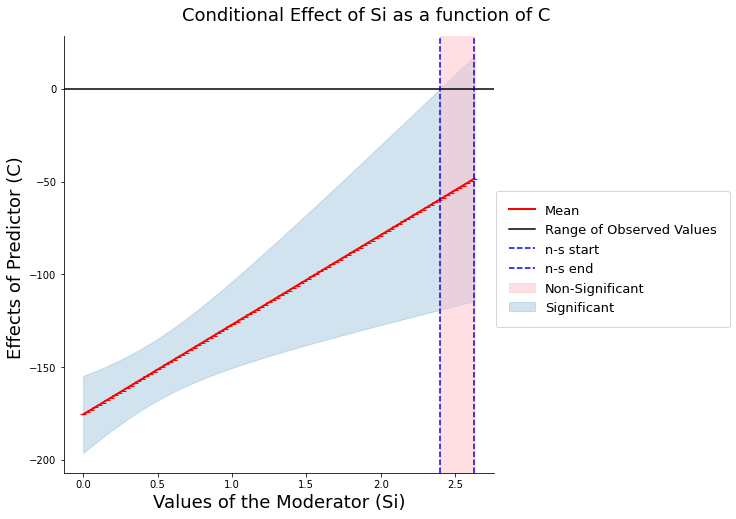

{'Negative on': [0.0, 2.398275239586364], 'Positive on': []}

In [696]:
from pyprocessmacro import Process
import pandas as pd
import matplotlib.pyplot as plt
p = Process(data=df, model=1, x="C",  m= "Si", y="Texp", suppr_init=True)
#p.summary()
direct_model = p.direct_model 
df_params_direct = direct_model.coeff_summary()

mm=p.floodlight_direct_effect(mod_name="Si")
floodlight_motiv_direct= p.floodlight_direct_effect(mod_name="Si")
floodlight_motiv_direct.get_significance_regions()
print(mm)
g= p.plot_conditional_direct_effects(hue= {"Si" 'g'}, x="Si", errstyle="band", 
                                  plot_kws=dict(marker="_", linewidth=2, color='red'), 
                                  err_kws = {"alpha": 0.2},
                                  facet_kws=dict(height=7.0))

g.set_axis_labels('Si', 'C')
g.fig.suptitle('Conditional Effect of Si as a function of C', fontsize=18)

g.map(plt.axhline, y=0,      ls='-',  c='black')
g.map(plt.axvline, x=2.398275239586364, ls='--', c='blue' )
g.map(plt.axvline, x=2.63,    ls='--', c='blue' )
g.map(plt.axvspan, xmin=2.398275239586364, xmax=2.63, ymin=-200, ymax=300, alpha=0.5, color='pink')
g.add_legend(labels=['Mean', 'Range of Observed Values',"n-s start",'n-s end','Non-Significant','Significant'],
             fontsize=13, loc='center right', frameon=True, borderpad=1)
g.set_axis_labels(x_var="Values of the Moderator (Si)", 
                  y_var="Effects of Predictor (C) ", fontsize=18)

plt.show(g)
floodlight_motiv_direct.get_significance_regions()


### Conditional Effect of Cu on C

/home/dave/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


*********************** FLOODLIGHT ANALYSIS OF THE DIRECT EFFECT ***********************

----------------------------------- Analysis Details -----------------------------------

Focal Moderator:
    Cu, Range = [0.0, 2.03]


----------------------------------- Analysis Results -----------------------------------

The direct effect is significantly negative on the interval [0.0, 0.816]


****************************************************************************************



/home/dave/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:132: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  figlegend = self.fig.legend(handles, labels, **kwargs)


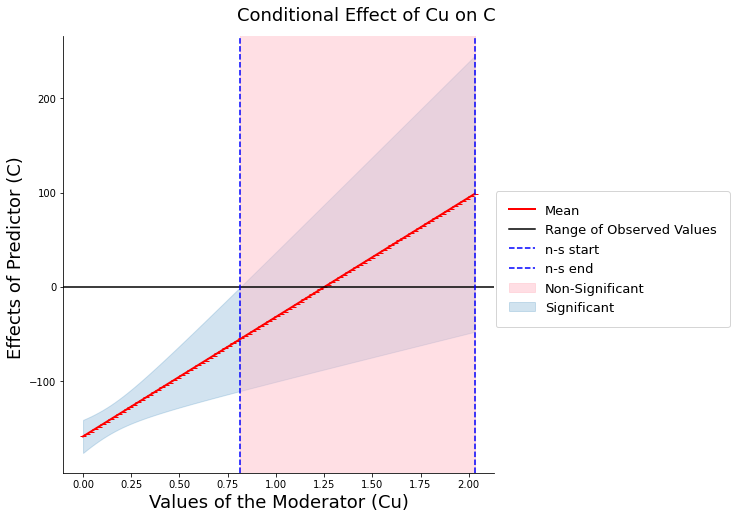

{'Negative on': [0.0, 0.8159584295155945], 'Positive on': []}

In [697]:
from pyprocessmacro import Process
import pandas as pd
import matplotlib.pyplot as plt

p = Process(data=df, model=1, x="C",  m= "Cu", y="Texp", suppr_init=True) 
#p.summary()
direct_model = p.direct_model 
df_params_direct = direct_model.coeff_summary()


mm=p.floodlight_direct_effect(mod_name="Cu")
floodlight_motiv_direct= p.floodlight_direct_effect(mod_name="Cu")
floodlight_motiv_direct.get_significance_regions()
print(mm)
g= p.plot_conditional_direct_effects(hue= {"Cu" 'g'}, x="Cu", errstyle="band", 
                                  plot_kws=dict(marker="_", linewidth=2, color='red'), 
                                  err_kws = {"alpha": 0.2},
                                  facet_kws=dict(height=7.0))
g.set_axis_labels('Cu', 'C')
g.fig.suptitle('Conditional Effect of Cu on C', fontsize=18)

g.map(plt.axhline, y=0,      ls='-',  c='black')
g.map(plt.axvline, x=0.8159584295155945, ls='--', c='blue' )
g.map(plt.axvline, x=2.03,    ls='--', c='blue' )
g.map(plt.axvspan, xmin=0.8159584295155945, xmax=2.03, ymin=-200, ymax=300, alpha=0.5, color='pink')
g.add_legend(labels=['Mean', 'Range of Observed Values',"n-s start",'n-s end','Non-Significant','Significant'],
             fontsize=13, loc='center right', frameon=True, borderpad=1)

g.set_axis_labels(x_var="Values of the Moderator (Cu)", y_var="Effects of Predictor (C) ", fontsize=18)

plt.show(g)
floodlight_motiv_direct.get_significance_regions()


### Conditional Effect of Mn on C

/home/dave/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


*********************** FLOODLIGHT ANALYSIS OF THE DIRECT EFFECT ***********************

----------------------------------- Analysis Details -----------------------------------

Focal Moderator:
    Mn, Range = [0.0, 5.03]


----------------------------------- Analysis Results -----------------------------------

The direct effect is significantly negative on the interval [0.0, 5.03]


****************************************************************************************



/home/dave/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:132: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  figlegend = self.fig.legend(handles, labels, **kwargs)


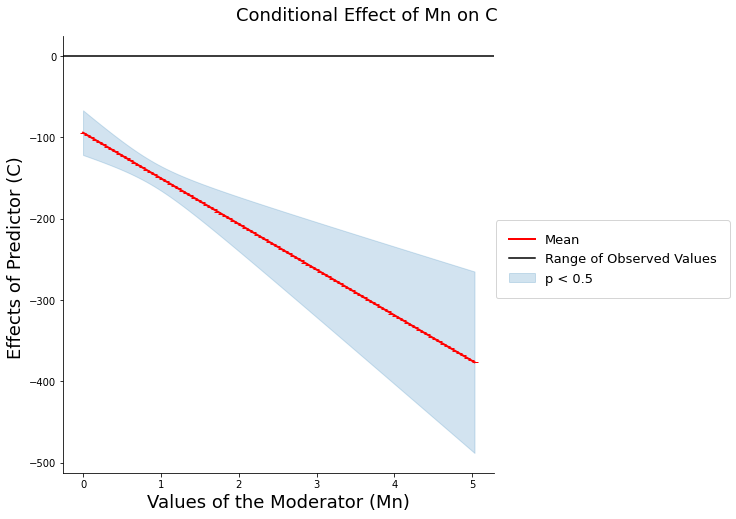

{'Negative on': [0.0, 5.03], 'Positive on': []}

In [698]:
from pyprocessmacro import Process
import pandas as pd
import matplotlib.pyplot as plt

p = Process(data=df, model=1, x="C",  m= "Mn", y="Texp", suppr_init=True)
#p.summary()
direct_model = p.direct_model
df_params_direct = direct_model.coeff_summary()


mm=p.floodlight_direct_effect(mod_name="Mn")
floodlight_motiv_direct= p.floodlight_direct_effect(mod_name="Mn")
floodlight_motiv_direct.get_significance_regions()
print(mm)
g= p.plot_conditional_direct_effects(hue= {"Mn" 'g'}, x="Mn", errstyle="band", 
                                  plot_kws=dict(marker="_", linewidth=2, color='red'), 
                                  err_kws = {"alpha": 0.2},
                                  facet_kws=dict(height=7.0))
g.set_axis_labels('Mn', 'C')
g.fig.suptitle('Conditional Effect of Mn on C', fontsize=18)

g.map(plt.axhline, y=0,      ls='-',  c='black')
g.add_legend(labels=['Mean', "Range of Observed Values",'p < 0.5','','Confidence Interval'], fontsize=13, loc='center right', frameon=True, borderpad=1)
g.set_axis_labels(x_var="Values of the Moderator (Mn)", y_var="Effects of Predictor (C) ", fontsize=18)

plt.show(g)
floodlight_motiv_direct.get_significance_regions()



<h1><center> Mn as a focal predictor </center></h1>

### Conditional Effect of C on Mn

/home/dave/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


*********************** FLOODLIGHT ANALYSIS OF THE DIRECT EFFECT ***********************

----------------------------------- Analysis Details -----------------------------------

Focal Moderator:
    C, Range = [0.02, 0.86]


----------------------------------- Analysis Results -----------------------------------

The direct effect is significantly negative on the interval [0.09891, 0.86]


****************************************************************************************



/home/dave/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:132: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  figlegend = self.fig.legend(handles, labels, **kwargs)


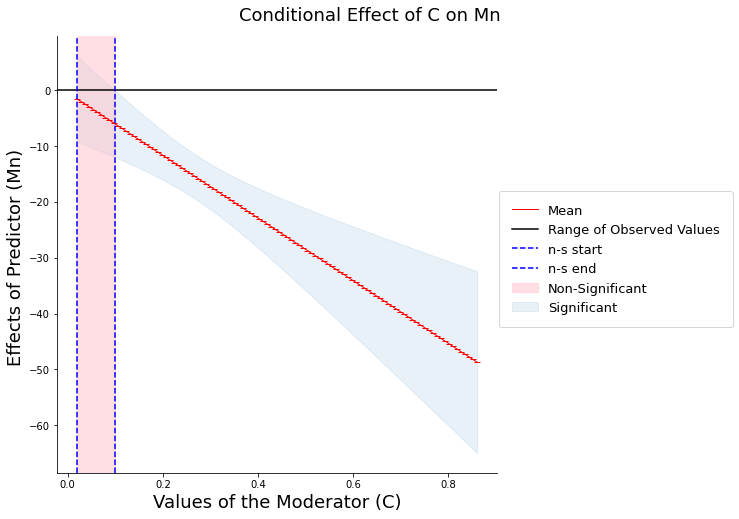

{'Negative on': [0.0989095865469426, 0.86], 'Positive on': []}

In [699]:
from pyprocessmacro import Process
import pandas as pd
import matplotlib.pyplot as plt

p = Process(data=df, model=1, x="Mn",  m= "C", y="Texp", suppr_init=True)
#p.summary()
direct_model = p.direct_model 
df_params_direct = direct_model.coeff_summary()

mm=p.floodlight_direct_effect(mod_name="C")
floodlight_motiv_direct= p.floodlight_direct_effect(mod_name="C")
floodlight_motiv_direct.get_significance_regions()
print(mm)
g= p.plot_conditional_direct_effects(hue= {"C" 'g'}, x="C", errstyle="band", 
                                  plot_kws=dict(marker="_", linewidth=1, color='red'), 
                                  err_kws = {"alpha": 0.1},
                                  facet_kws=dict(height=7.0))


g.set_axis_labels('C', 'Mn')
g.fig.suptitle('Conditional Effect of C on Mn', fontsize=18)

g.map(plt.axhline, y=0,      ls='-',  c='black')
g.map(plt.axvline, x=0.02, ls='--', c='blue' )
g.map(plt.axvline, x=0.09891,    ls='--', c='blue' )
g.map(plt.axvspan, xmin=0.02, xmax=0.0989095865469426, ymin=-70, ymax=10, alpha=0.5, color='pink')
g.add_legend(labels=['Mean', 'Range of Observed Values',"n-s start",'n-s end','Non-Significant','Significant'],
             fontsize=13, loc='center right', frameon=True, borderpad=1)
g.set_axis_labels(x_var="Values of the Moderator (C)", y_var="Effects of Predictor (Mn) ", fontsize=18)

plt.show(g)
floodlight_motiv_direct.get_significance_regions()


### Conditional Effect of Si on Mn

/home/dave/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


*********************** FLOODLIGHT ANALYSIS OF THE DIRECT EFFECT ***********************

----------------------------------- Analysis Details -----------------------------------

Focal Moderator:
    Si, Range = [0.0, 2.63]


----------------------------------- Analysis Results -----------------------------------

The direct effect is significantly negative on the interval [0.0, 0.8983]
The direct effect is significantly positive on the interval [2.215, 2.63]


****************************************************************************************



/home/dave/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:132: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  figlegend = self.fig.legend(handles, labels, **kwargs)


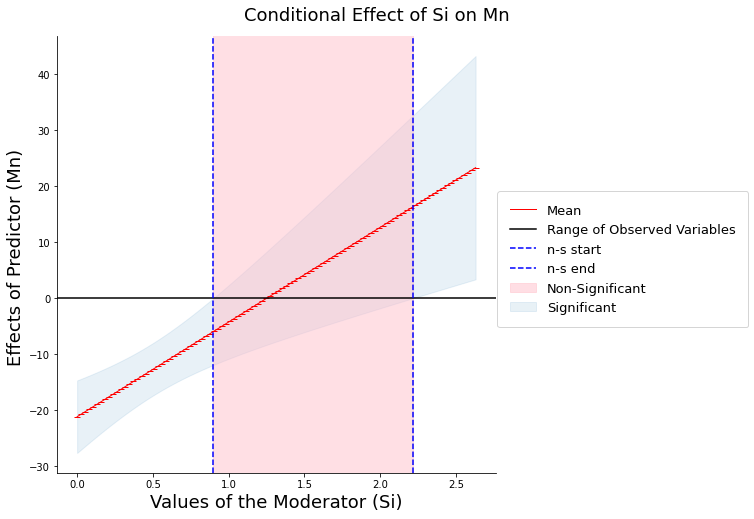

{'Negative on': [0.0, 0.8983175340664658],
 'Positive on': [2.214886462020073, 2.63]}

In [700]:
from pyprocessmacro import Process
import pandas as pd
import matplotlib.pyplot as plt

p = Process(data=df, model=1, x="Mn",  m= "Si", y="Texp", suppr_init=True)
#p.summary()

direct_model = p.direct_model
df_params_direct = direct_model.coeff_summary()

mm=p.floodlight_direct_effect(mod_name="Si")
floodlight_motiv_direct= p.floodlight_direct_effect(mod_name="Si")
floodlight_motiv_direct.get_significance_regions()
print(mm)
g= p.plot_conditional_direct_effects(hue= {"Si" 'g'}, x="Si", errstyle="band", 
                                  plot_kws=dict(marker="_", linewidth=1, color='red'), 
                                  err_kws = {"alpha": 0.1},
                                  facet_kws=dict(height=7.0))


g.set_axis_labels('Si', 'Mn')
g.fig.suptitle('Conditional Effect of Si on Mn', fontsize=18)

g.map(plt.axhline, y=0,      ls='-',  c='black')
g.map(plt.axvline, x=0.8983175340664658,    ls='--', c='blue' )
g.map(plt.axvline, x=2.214886462020073,   ls='--', c='blue' )
g.map(plt.axvspan, xmin=0.8983175340664658, xmax=2.214886462020073, ymin=-30, ymax=40, alpha=0.5, color='pink')

g.add_legend(labels=['Mean', 'Range of Observed Variables',"n-s start",'n-s end','Non-Significant','Significant'], fontsize=13, loc='center right', frameon=True, borderpad=1)
g.set_axis_labels(x_var="Values of the Moderator (Si)", y_var="Effects of Predictor (Mn) ", fontsize=18)

plt.show(g)
floodlight_motiv_direct.get_significance_regions()


<h1><center> JOHNSON NEYMAN 3 - WAY INTERACTION  </center></h1>

### Conditional Effect of Cu on Si, THETA_1

/home/dave/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


*********************** FLOODLIGHT ANALYSIS OF THE DIRECT EFFECT ***********************

----------------------------------- Analysis Details -----------------------------------

Focal Moderator:
    Cu, Range = [0.0, 2.03]


----------------------------------- Analysis Results -----------------------------------

The direct effect is significantly negative on the interval [0.0, 2.03]


****************************************************************************************



/home/dave/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:132: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  figlegend = self.fig.legend(handles, labels, **kwargs)


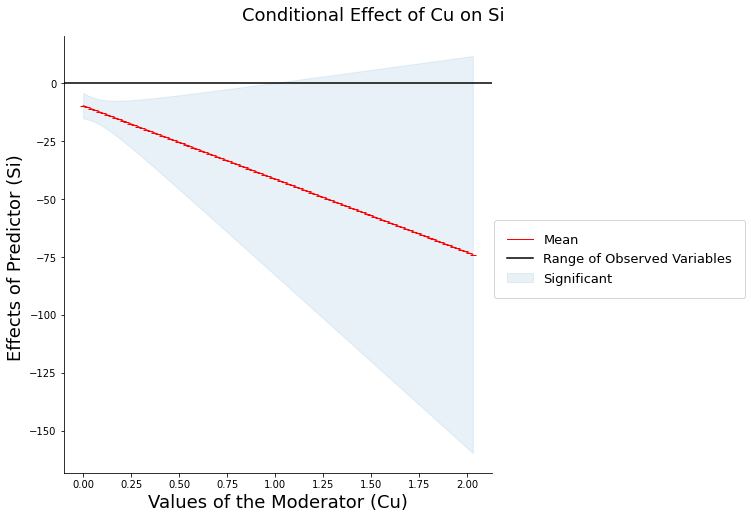

In [701]:
## from pyprocessmacro import Process
import pandas as pd
import matplotlib.pyplot as plt

p = Process(data=df, model=1, x="Si",  m= "Cu", y="Texp", suppr_init=True)
direct_model = p.direct_model # The model for the direct effect
df_params_direct = direct_model.coeff_summary()

mm=p.floodlight_direct_effect(mod_name="Cu")
floodlight_motiv_direct= p.floodlight_direct_effect(mod_name="Cu")
floodlight_motiv_direct.get_significance_regions()
print(mm)
g= p.plot_conditional_direct_effects(hue= {"Cu" 'g'}, x="Cu", errstyle="band", 
                                  plot_kws=dict(marker="_", linewidth=1, color='red'), 
                                  err_kws = {"alpha": 0.1},
                                  facet_kws=dict(height=7.0))


g.set_axis_labels('Cu', 'Si')
g.fig.suptitle('Conditional Effect of Cu on Si', fontsize=18)
g.map(plt.axhline, y=0,      ls='-',  c='black')
g.add_legend(labels=['Mean', 'Range of Observed Variables',"Significant",'n-s end','Non-Significant','Significant'],
             fontsize=13, loc='center right', frameon=True, borderpad=1)
g.set_axis_labels(x_var="Values of the Moderator (Cu)", y_var="Effects of Predictor (Si) ", fontsize=18)
plt.show(g)


In [702]:
from pyprocessmacro import utils as u
from pyprocessmacro import models as m
from pyprocessmacro import Process as p
p = Process(data=df, model=1, x="Si",  m= "Cu", y="Texp", suppr_init=True)

mm=p.floodlight_direct_effect(mod_name="Cu")
floodlight_motiv_direct= p.floodlight_direct_effect(mod_name="Cu")
a = data["Cu"]
a[:]
floodlight_motiv_direct= p.spotlight_direct_effect({"Cu":a[:]})
effect= floodlight_motiv_direct.Effect
effect = pd.DataFrame(effect)
floodlight_motiv_direct


/home/dave/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Effect,SE,LLCI,ULCI,Cu
0,-16.576297,4.680183,-25.749287,-7.403307,0.22
1,-16.576297,4.680183,-25.749287,-7.403307,0.22
2,-16.576297,4.680183,-25.749287,-7.403307,0.22
3,-16.576297,4.680183,-25.749287,-7.403307,0.22
4,-16.576297,4.680183,-25.749287,-7.403307,0.22
...,...,...,...,...,...
1267,-9.925171,2.700649,-15.218346,-4.631997,0.01
1268,-9.925171,2.700649,-15.218346,-4.631997,0.01
1269,-9.925171,2.700649,-15.218346,-4.631997,0.01
1270,-9.925171,2.700649,-15.218346,-4.631997,0.01


In [703]:
'''aa=a[:]
b_si=-50.9506
b_cu=-32.7341
b_add = np.add(b_si, b_cu)
theta_1 = b_add*aa
effect=theta_1
effect = pd.DataFrame(effect)
effect.columns = effect.columns.str.replace('Cu', 'theta_1')

effect'''

/home/dave/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


"aa=a[:]\nb_si=-50.9506\nb_cu=-32.7341\nb_add = np.add(b_si, b_cu)\ntheta_1 = b_add*aa\neffect=theta_1\neffect = pd.DataFrame(effect)\neffect.columns = effect.columns.str.replace('Cu', 'theta_1')\n\neffect"

In [704]:
frames = [data, effect]
data = pd.concat(frames, axis=1)

data.columns = data.columns.str.replace('Effect', 'theta_1')
data

,1,C,Si,Mn,Cr,Mo,Ni,Al,Cu,ppmB,...,Mo Cu ppmB,Ni Al Cu,Ni Al ppmB,Ni Cu ppmB,Al Cu ppmB,Pa,Rc,lnRc,Texp,theta_1
0,1.0,0.13,0.27,0.22,0.08,0.00,0.06,0.00,0.22,0.0,...,0.0000,0.000000,0.00000,0.0000,0.0000,1132.36,60.000,4.094345,770,-16.576297
1,1.0,0.13,0.27,0.22,0.08,0.00,0.06,0.00,0.22,0.0,...,0.0000,0.000000,0.00000,0.0000,0.0000,1132.36,8.500,2.140066,805,-16.576297
2,1.0,0.13,0.27,0.22,0.08,0.00,0.06,0.00,0.22,0.0,...,0.0000,0.000000,0.00000,0.0000,0.0000,1132.36,0.650,-0.430783,825,-16.576297
3,1.0,0.13,0.27,0.21,0.08,0.00,0.06,0.00,0.22,0.0,...,0.0000,0.000000,0.00000,0.0000,0.0000,1132.36,0.050,-2.995732,840,-16.576297
4,1.0,0.13,0.27,0.21,0.08,0.00,0.06,0.00,0.22,0.0,...,0.0000,0.000000,0.00000,0.0000,0.0000,1132.36,0.004,-5.521461,855,-16.576297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1267,1.0,0.20,0.36,0.80,1.12,0.01,0.02,0.05,0.01,28.0,...,0.0028,0.000010,0.02800,0.0056,0.0140,1286.59,6.000,1.791759,755,-9.925171
1268,1.0,0.20,0.36,0.80,1.12,0.01,0.02,0.05,0.01,28.0,...,0.0028,0.000010,0.02800,0.0056,0.0140,1286.59,3.000,1.098612,775,-9.925171
1269,1.0,0.20,0.36,0.80,1.12,0.01,0.02,0.05,0.01,28.0,...,0.0028,0.000010,0.02800,0.0056,0.0140,1286.59,1.500,0.405465,790,-9.925171
1270,1.0,0.20,0.40,1.78,0.27,0.01,1.15,0.05,0.01,28.0,...,0.0028,0.000575,1.61000,0.3220,0.0140,1286.59,1.500,0.405465,650,-9.925171


### Conditional Effect of SiCu (theta_1) on C

/home/dave/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


*********************** FLOODLIGHT ANALYSIS OF THE DIRECT EFFECT ***********************

----------------------------------- Analysis Details -----------------------------------

Focal Moderator:
    theta_1, Range = [-73.9, -9.608]


----------------------------------- Analysis Results -----------------------------------

The direct effect is significantly negative on the interval [-73.9, -9.608]


****************************************************************************************



/home/dave/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:132: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  figlegend = self.fig.legend(handles, labels, **kwargs)


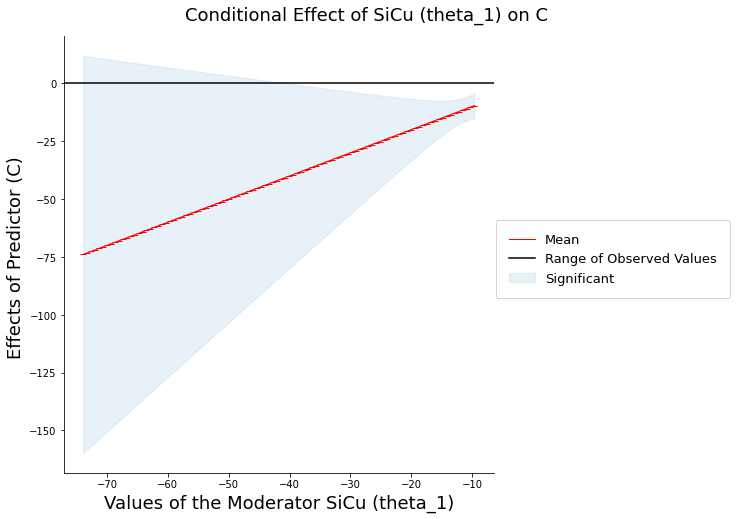

{'Negative on': [-73.90266664705611, -9.608451094179827], 'Positive on': []}

In [705]:
from pyprocessmacro import Process
import pandas as pd
import matplotlib.pyplot as plt
df = data
p = Process(data=df, model=1,  x="Si",  m= "theta_1", y="Texp", suppr_init=True)

direct_model = p.direct_model 
df_params_direct = direct_model.coeff_summary()
mm=p.floodlight_direct_effect(mod_name="theta_1")
floodlight_motiv_direct= p.floodlight_direct_effect(mod_name="theta_1")
floodlight_motiv_direct.get_significance_regions()
#p.summary()
print(mm)

g= p.plot_conditional_direct_effects(x="theta_1", errstyle="band", 
                                  plot_kws=dict(marker="_", linewidth=1, color='red'), 
                                  err_kws = {"alpha": 0.1},
                                  facet_kws=dict(height=7.0))

g.set_axis_labels('theta_1', 'C')
g.fig.suptitle('Conditional Effect of SiCu (theta_1) on C', fontsize=18)

g.map(plt.axhline, y=0,      ls='-',  c='black')
g.add_legend(labels=['Mean', 'Range of Observed Values',"Significant",'n-s end','Non-Significant','Significant'],
             fontsize=13, loc='center right', frameon=True, borderpad=1)
g.set_axis_labels(x_var="Values of the Moderator SiCu (theta_1)", y_var="Effects of Predictor (C) ", fontsize=18)

plt.show(g)
floodlight_motiv_direct.get_significance_regions()

In [706]:
Data=data

/home/dave/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


 
<h1><center>OBJECTIVE THREE</center></h1>

 
<h1><center>SIMILARITY MEASURE</center></h1>

<h1><center>CARNONICAL CORRELATION ANALYSIS</center></h1>

### Data Preprocessing

In [707]:
columns_to_keep = ['Steel','C','Si','Mn','Cr','Mo','Ni','Al','Cu','ppmB','Pa','Rc','Texp']
ferriteStart_dataframe = pd.read_csv('CCT-TFS syyskuu Henry.csv', encoding = 'utf-8')
ferriteFinish_dataframe = pd.read_table("CCT-TPS syyskuu.DAT", sep="\s+", usecols=columns_to_keep)

FF=ferriteFinish_dataframe.drop(['Steel','Pa','Rc'], axis = 1)
df=ferriteStart_dataframe.drop(['Steel','Pa','Rc','lnRc'], axis = 1)
FS = df.iloc[:-412 , :]

FS.describe()
FF.describe()
FS

<>:3: DeprecationWarning: invalid escape sequence \s
<>:3: DeprecationWarning: invalid escape sequence \s
<ipython-input-707-24e65a51f6a4>:3: DeprecationWarning: invalid escape sequence \s
  ferriteFinish_dataframe = pd.read_table("CCT-TPS syyskuu.DAT", sep="\s+", usecols=columns_to_keep)


,C,Si,Mn,Cr,Mo,Ni,Al,Cu,ppmB,Texp
0,0.13,0.27,0.22,0.08,0.00,0.06,0.0,0.22,0.0,770
1,0.13,0.27,0.22,0.08,0.00,0.06,0.0,0.22,0.0,805
2,0.13,0.27,0.22,0.08,0.00,0.06,0.0,0.22,0.0,825
3,0.13,0.27,0.21,0.08,0.00,0.06,0.0,0.22,0.0,840
4,0.13,0.27,0.21,0.08,0.00,0.06,0.0,0.22,0.0,855
...,...,...,...,...,...,...,...,...,...,...
855,0.18,0.24,0.14,1.71,0.33,1.66,0.0,0.17,0.0,690
856,0.18,0.24,0.14,1.71,0.33,1.66,0.0,0.17,0.0,710
857,0.18,0.24,0.13,1.71,0.33,1.66,0.0,0.17,0.0,720
858,0.19,0.24,0.19,0.89,0.06,0.20,0.0,0.27,0.0,750


In [708]:
FF

/home/dave/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,C,Si,Mn,Cr,Mo,Ni,Al,Cu,ppmB,Texp
0,0.13,0.27,0.22,0.08,0.0,0.06,0.00,0.22,0.0,600
1,0.13,0.27,0.22,0.08,0.0,0.06,0.00,0.22,0.0,675
2,0.13,0.27,0.22,0.08,0.0,0.06,0.00,0.22,0.0,690
3,0.13,0.27,0.21,0.08,0.0,0.06,0.00,0.22,0.0,695
4,0.13,0.27,0.20,0.08,0.0,0.06,0.00,0.22,0.0,700
...,...,...,...,...,...,...,...,...,...,...
855,0.15,0.02,1.15,0.05,0.0,0.00,0.04,0.00,0.0,640
856,0.15,0.02,1.15,0.05,0.0,0.00,0.04,0.00,0.0,630
857,0.15,0.02,1.15,0.05,0.0,0.00,0.04,0.00,0.0,625
858,0.38,1.94,2.06,0.13,0.0,0.00,0.97,0.00,0.0,720


#### Data Standardization

In [709]:
scaler = StandardScaler().fit(FS)
rescaledX = scaler.transform(FS)

rescaledX=pd.DataFrame(rescaledX)
data1 = rescaledX
data1 = data1.set_axis(['C', 'Si', 'Mn', 'Cr', 'Mo', 'Ni', 'Al', 'Cu', 'ppmB', 'Texp'], axis=1, inplace=False)
X_mc = data1


scaler = StandardScaler().fit(FF)
rescaledX = scaler.transform(FF)

rescaledX=pd.DataFrame(rescaledX)
data2 = rescaledX
data2 = data2.set_axis(['C', 'Si', 'Mn', 'Cr', 'Mo', 'Ni', 'Al', 'Cu', 'ppmB', 'Texp'], axis=1, inplace=False)
Y_mc = data2


/home/dave/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### Clustering Using CCA

/home/dave/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/home/dave/.local/lib/python3.8/site-packages/sklearn/cross_decomposition/_pls.py:319: DeprecationWarning: scipy.linalg.pinv2 is deprecated since SciPy 1.7.0, use scipy.linalg.pinv instead
  pinv2(np.dot(self.x_loadings_.T, self.x_weights_),
/home/dave/.local/lib/python3.8/site-packages/sklearn/cross_decomposition/_pls.py:322: DeprecationWarning: scipy.linalg.pinv2 is deprecated since SciPy 1.7.0, use scipy.linalg.pinv instead
  self.y_weights_, pinv2(np.dot(self.y_loadings_.T, self.y_weights_),
/home/dave/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:786: FutureWarning: 'precompute_distances' was deprecated in vers

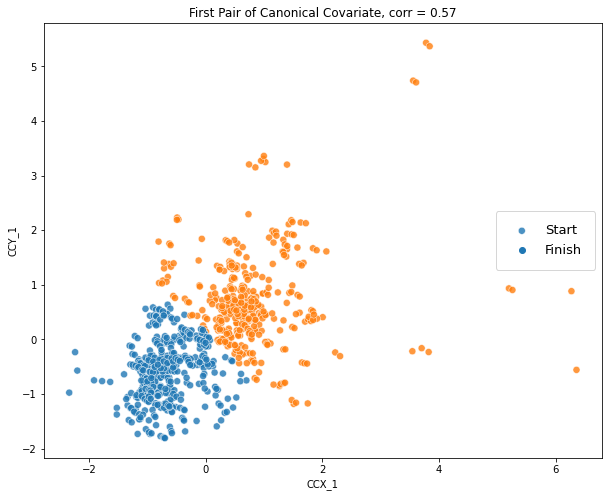

In [710]:
from sklearn.cross_decomposition import CCA
import pandas as pd
from sklearn.cluster import KMeans
clustering_kmeans = KMeans(n_clusters=2, precompute_distances="auto", n_jobs=-1)

ca = CCA(n_components=4)

ca.fit(X_mc, Y_mc)
X_c, Y_c = ca.transform(X_mc, Y_mc)

results = pd.DataFrame({"CCX_1":X_c[:, 0],
                        "CCY_1":Y_c[:, 0],
                       })

data1['clusters'] = clustering_kmeans.fit_predict(results)

plt.figure(figsize=(10,8))
ax=sns.scatterplot(x="CCX_1",   y="CCY_1", hue=data1['clusters'], data=results, marker='o',
                    alpha=0.8, s=50, cmap='autumn' )#cmap=plt.cm.coolwarm)
plt.title('First Pair of Canonical Covariate, corr = %.2f' %
         np.corrcoef(X_c[:, 0], Y_c[:, 0])[0, 1])

ax.legend(labels=[ 'Start', 'Finish'],
             fontsize=13, loc='center right', frameon=True, borderpad=1)

plt.show()


/home/dave/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/home/dave/.local/lib/python3.8/site-packages/sklearn/cross_decomposition/_pls.py:319: DeprecationWarning: scipy.linalg.pinv2 is deprecated since SciPy 1.7.0, use scipy.linalg.pinv instead
  pinv2(np.dot(self.x_loadings_.T, self.x_weights_),
/home/dave/.local/lib/python3.8/site-packages/sklearn/cross_decomposition/_pls.py:322: DeprecationWarning: scipy.linalg.pinv2 is deprecated since SciPy 1.7.0, use scipy.linalg.pinv instead
  self.y_weights_, pinv2(np.dot(self.y_loadings_.T, self.y_weights_),
/home/dave/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:786: FutureWarning: 'precompute_distances' was deprecated in vers

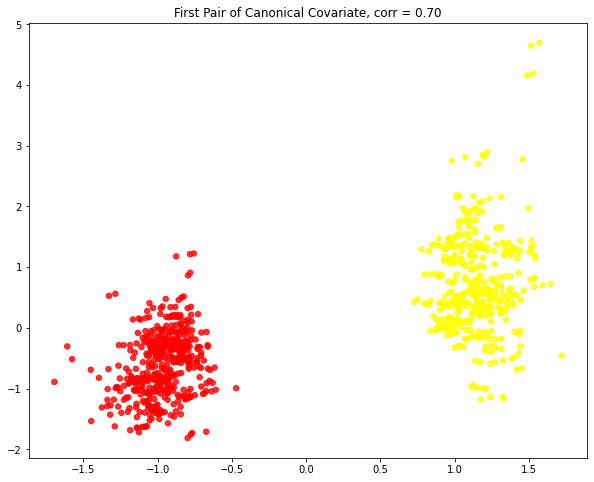

In [711]:
from sklearn.cross_decomposition import CCA
import pandas as pd
from matplotlib import pyplot 
from sklearn.cluster import KMeans
clustering_kmeans = KMeans(n_clusters=2, precompute_distances="auto", n_jobs=-1)

ca = CCA(n_components=4)

ca.fit(X_mc, Y_mc)
X_c, Y_c = ca.transform(X_mc, Y_mc)

'''ca.fit(FS, FF)
X_c, Y_c = ca.transform(FS, FF)'''

results = pd.DataFrame({"CCX_1":X_c[:, 0],
                        "CCY_1":Y_c[:, 0],
                        "CCX_2":X_c[:, 1],
                        "CCY_2":Y_c[:, 1]
                       })

data1['clusters'] = clustering_kmeans.fit_predict(results)

plt.figure(figsize=(10,8))
pyplot.scatter(x="CCX_1",   y="CCY_1", c=data1['clusters'], data=results, marker='o',
                    alpha=0.8, s=30, cmap='autumn' )#cmap=plt.cm.coolwarm)
plt.title('First Pair of Canonical Covariate, corr = %.2f' %
         np.corrcoef(X_c[:, 0], Y_c[:, 0])[0, 1])
ax.legend(labels=[ 'Start', 'Finish'],
             fontsize=13, loc='center right', frameon=True, borderpad=1)

plt.show()


# SIMILARITY PLOT

In [712]:
columns_to_keep = ['Steel','C','Si','Mn','Cr','Mo','Ni','Al','Cu','ppmB','Pa','Rc','Texp']
ferriteStart_dataframe = pd.read_csv('CCT-TFS syyskuu Henry.csv', encoding = 'utf-8')
ferriteFinish_dataframe = pd.read_table("CCT-TPS syyskuu.DAT", sep="\s+", usecols=columns_to_keep)

FF=ferriteFinish_dataframe.drop(['Steel','Pa','C','Si','Mn','Cr','Mo','Ni','Al','Cu','ppmB'], axis = 1)
df=ferriteStart_dataframe.drop(['Steel','lnRc','Pa','C','Si','Mn','Cr','Mo','Ni','Al','Cu','ppmB'], axis = 1)
FS = df.iloc[:-412 , :]

#FS.describe()
#FF.describe()

FS = FS.rename(columns={'Rc': 'Rc_s', 'Texp': 'Texp_s'})
FF = FF.rename(columns={'Rc': 'Rc_f', 'Texp': 'Texp_f'})

frames = [FS, FF]
result = pd.concat([FS, FF], axis = 1)
result

x1 = result.iloc[:, 0]
y1 = result.iloc[:, 1]
x2 = result.iloc[:, 2]
y2 = result.iloc[:, 3]

result

/home/dave/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:3: DeprecationWarning: invalid escape sequence \s
<>:3: DeprecationWarning: invalid escape sequence \s
<ipython-input-712-2593e6d6d43c>:3: DeprecationWarning: invalid escape sequence \s
  ferriteFinish_dataframe = pd.read_table("CCT-TPS syyskuu.DAT", sep="\s+", usecols=columns_to_keep)


,Rc_s,Texp_s,Rc_f,Texp_f
0,60.000,770,145.000,600
1,8.500,805,21.500,675
2,0.650,825,2.000,690
3,0.050,840,0.195,695
4,0.004,855,0.019,700
...,...,...,...,...
855,1.000,690,7.500,640
856,0.180,710,10.000,630
857,0.045,720,20.000,625
858,8.400,750,0.100,720


In [713]:
scaler = StandardScaler().fit(result)
rescaledX = scaler.transform(result)

rescaledX=pd.DataFrame(rescaledX)
result1 = rescaledX
result1 = result1.set_axis(['Rc_s','Texp_s','Rc_f','Texp_f'], axis=1, inplace=False)
result1

a1 = result1.iloc[:, 0]
b1 = result1.iloc[:, 1]
a2 = result1.iloc[:, 2]
b2 = result1.iloc[:, 3]
result1

/home/dave/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Rc_s,Texp_s,Rc_f,Texp_f
0,4.393705,1.026412,11.348578,-1.727076
1,0.408679,1.764379,1.449327,0.170454
2,-0.198747,2.186075,-0.113712,0.549960
3,-0.245175,2.502346,-0.258393,0.676462
4,-0.248734,2.818618,-0.272501,0.802964
...,...,...,...,...
855,-0.171664,-0.660370,0.327145,-0.715060
856,-0.235115,-0.238675,0.527535,-0.968064
857,-0.245561,-0.027827,1.329094,-1.094566
858,0.400941,0.604716,-0.266008,1.308972


/home/dave/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/home/dave/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/dave/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation

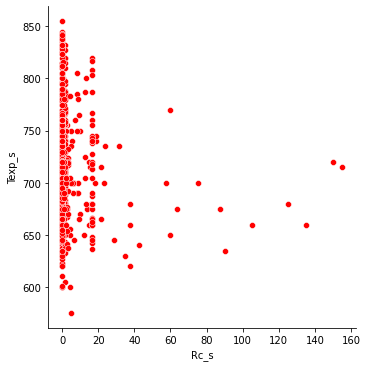

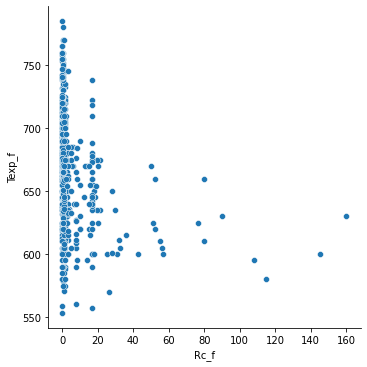

In [714]:
sns.relplot(x1,y1,data=result1, color='r')
sns.relplot(x2,y2,data=result1)
plt.show()

/home/dave/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/home/dave/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue, size. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


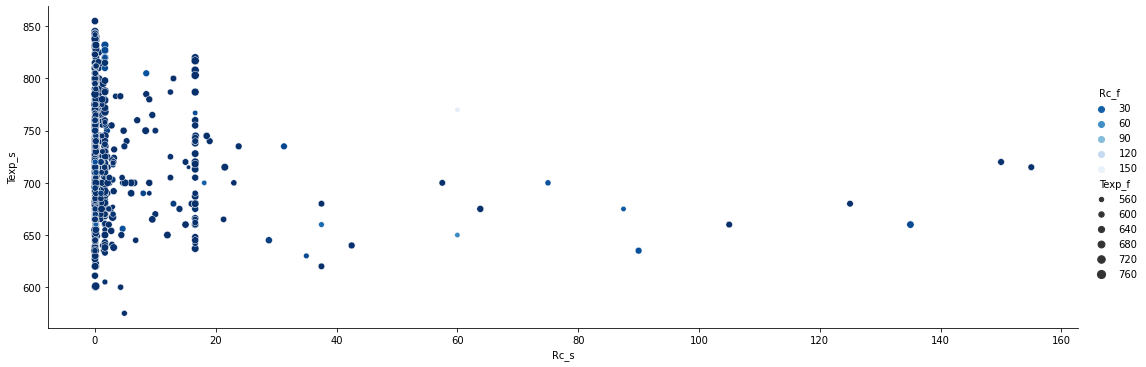

In [715]:
sns.relplot(x1, y1, x2, y2, data=results, aspect=3, hue='Rc_f', palette='Blues_r')


/home/dave/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


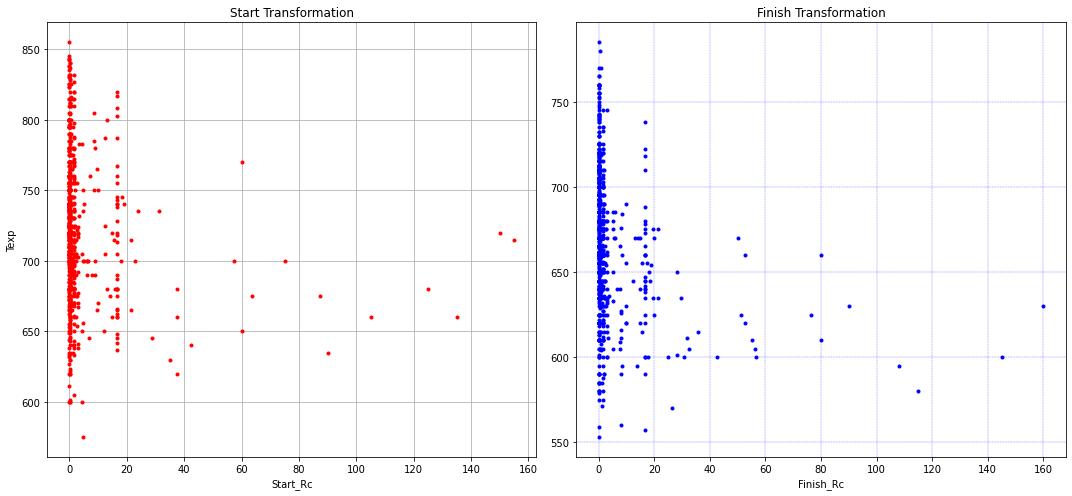

In [716]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1,2, figsize = (15,7))
axes[0].plot(x1, y1, '.',color='r', lw=2)
axes[0].grid(True)
axes[0].set_title('Start Transformation')
axes[0].set_xlabel('Start_Rc')
axes[0].set_ylabel('Texp')

axes[1].plot(x2, y2, '.', color='b' )
axes[1].grid(color='b', ls = '-.', lw = 0.25)
axes[1].set_title('Finish Transformation')
axes[1].set_xlabel('Finish_Rc')

fig.tight_layout()
plt.show()

/home/dave/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


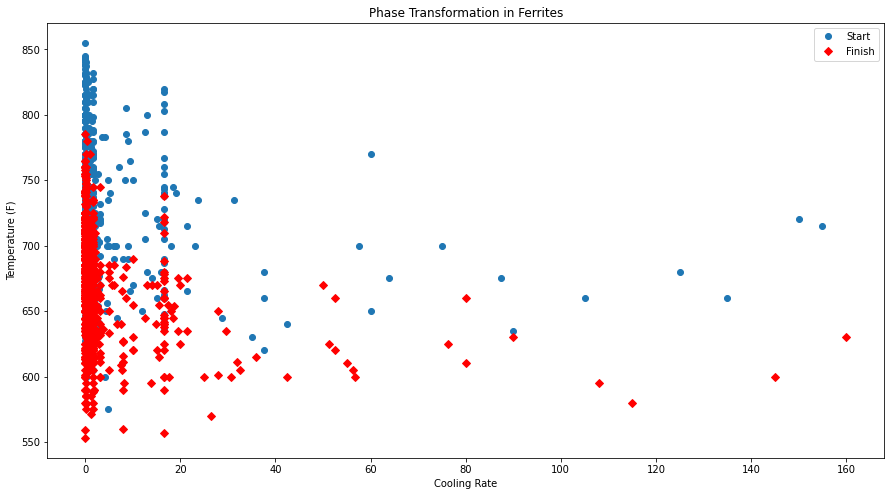

In [717]:
fig, axes = plt.subplots( 1,1, figsize = (15,8))

plt.plot( x1, y1, 'o')
plt.plot( x2, y2, 'D', color='r')
plt.title('Phase Transformation in Ferrites')
plt.xlabel('Cooling Rate')
plt.ylabel('Temperature (F)')
plt.legend(['Start', 'Finish']) 

In [718]:
import math
def EuclideanDistance(R1,R2,T1,T2):
    dist = np.sqrt((R2 - R1)**2 + (T2 - T1)**2)
    return dist
#print (calculateDistance(x1, y1, x2, y2))

RESULT = pd.DataFrame(result)
R2 = RESULT[["Rc_f"]]
T2 = RESULT[["Texp_f"]]
R1 = RESULT[["Rc_s"]]
T1 = RESULT[["Texp_s"]]

RESULT['Eucl_Dist'] = EuclideanDistance(RESULT['Rc_f'], RESULT['Texp_f'], RESULT['Rc_s'], RESULT['Texp_s'])
RESULTS=RESULT.sort_values('Eucl_Dist', ascending=False)
RESULTS

/home/dave/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Rc_s,Texp_s,Rc_f,Texp_f,Eucl_Dist
280,0.016,845,0.166,752,1131.040372
284,0.016,843,0.166,743,1123.576600
288,0.016,838,0.166,748,1123.153095
279,0.166,840,1.660,745,1121.550491
538,0.016,838,0.016,742,1119.266474
...,...,...,...,...,...
34,4.880,575,0.145,625,845.860855
29,35.000,630,15.500,615,844.645044
0,60.000,770,145.000,600,843.282278
5,87.500,675,25.000,600,822.059152
